# Time Series (Energy Consumption Dataset)

#### Task is to train __time series__ models and __forecast__ (in the future) for 
- __`Gas consumption`__
- __`Electricity consumption`__
- __`Water consumption`__ 

#### About Dataset
- Dataset 

In [522]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
# Set the seaborn style
sns.set_style("darkgrid")


df = pd.read_csv('../Datasets/Energy Consumption Dataset.csv')



#Info on df
print(df.info())

#checking for na values 
print(df.isna().sum())
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DATE                           397 non-null    object 
 1   Gas Consumption (tons)         397 non-null    float64
 2   Electricity Consumption (MWh)  397 non-null    float64
 3   Water Consumption (tons)       397 non-null    float64
dtypes: float64(3), object(1)
memory usage: 12.5+ KB
None
DATE                             0
Gas Consumption (tons)           0
Electricity Consumption (MWh)    0
Water Consumption (tons)         0
dtype: int64


DATE  Gas Consumption (tons)  Electricity Consumption (MWh)  \
0     1/1/1990                    18.0                          725.1   
1     1/2/1990                    15.8                          706.7   
2     1/3/1990                    17.3                          624.5   
3     1/4/1990                    18.9                          574.7   
4     1/5/1990                    22.0                          553.2   
..         ...                     ...                            ...   
392   1/9/2022                    27.7                          986.2   
393  1/10/2022                    31.8                          936.1   
394  1/11/2022                    31.0                          973.4   
395  1/12/2022                    32.4                         1147.2   
396   1/1/2023                    31.3                         1294.0   

     Water Consumption (tons)  
0                       548.8  
1                       640.7  
2                       511.1  
3                       515.3  
4                       488.4  
..                        ...  
392                     513.3  
393                     373.1  
394                     343.9  
395                     348.3  
396                     260.2  

[397 rows x 4 columns]

In [2]:
df.describe()

Gas Consumption (tons)  Electricity Consumption (MWh)  \
count              397.000000                     397.000000   
mean                23.785139                     888.472544   
std                  4.903452                     153.877594   
min                 11.600000                     553.200000   
25%                 20.200000                     771.100000   
50%                 23.500000                     897.800000   
75%                 27.900000                    1005.200000   
max                 46.000000                    1294.000000   

       Water Consumption (tons)  
count                397.000000  
mean                 484.953652  
std                  133.908863  
min                   44.400000  
25%                  384.400000  
50%                  487.400000  
75%                  580.200000  
max                  811.000000

### Changing DATE column to datetime format and setting as Index

In [523]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%d/%m/%Y')

new_df = df.copy()#.drop(columns=['DATE'])
new_df.set_index('DATE', inplace=True)
new_df = new_df.resample('MS').mean()

# Data Exploration/ Visualization

### Boxplot of the series

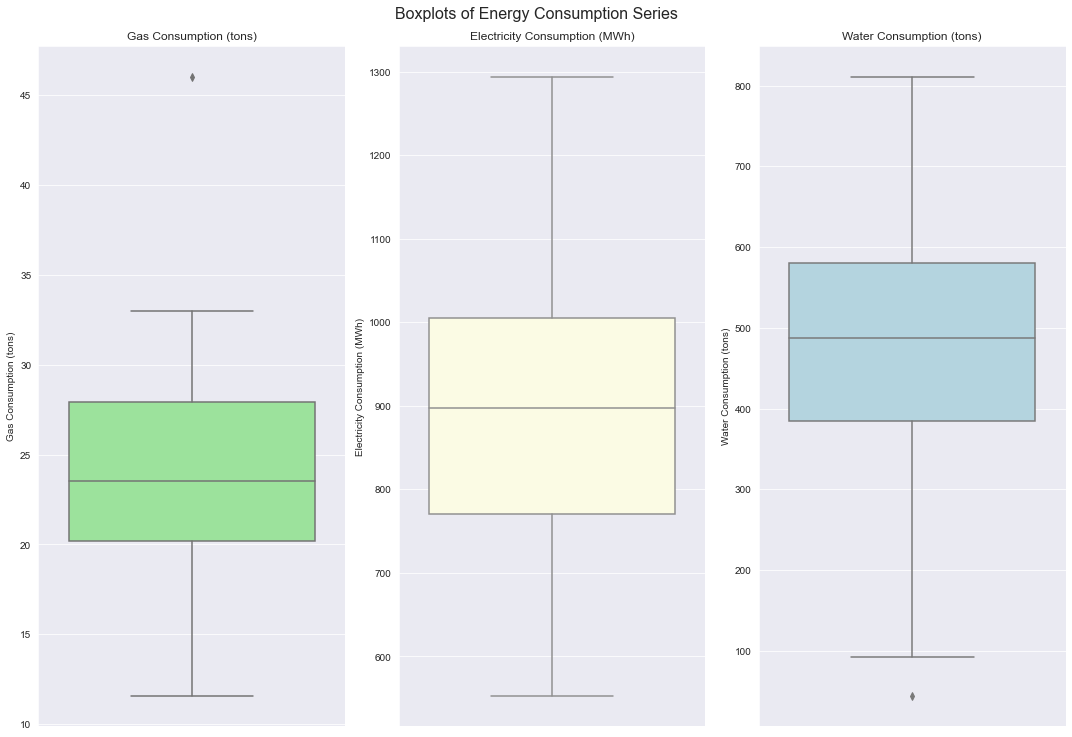

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 10))

# Create boxplots for each column in new_df
sns.boxplot(ax=axes[0], y=new_df.iloc[:, 0],color='lightgreen')
sns.boxplot(ax=axes[1], y=new_df.iloc[:, 1], color='lightyellow')
sns.boxplot(ax=axes[2], y=new_df.iloc[:, 2], color='lightblue')

# Set titles for each subplot
axes[0].set_title(new_df.iloc[:, 0].name)
axes[1].set_title(new_df.iloc[:, 1].name)
axes[2].set_title(new_df.iloc[:, 2].name)

# Adjust layout for subplots
plt.tight_layout()

# Add an overall title for the entire plot
plt.suptitle('Boxplots of Energy Consumption Series', y=1.02, fontsize=16)

# Show the plot
plt.show()


- we can observe __one outlier__ each in both __Gas and Water consumption__ datasets which we'll investigate later

### Distribution Of Features


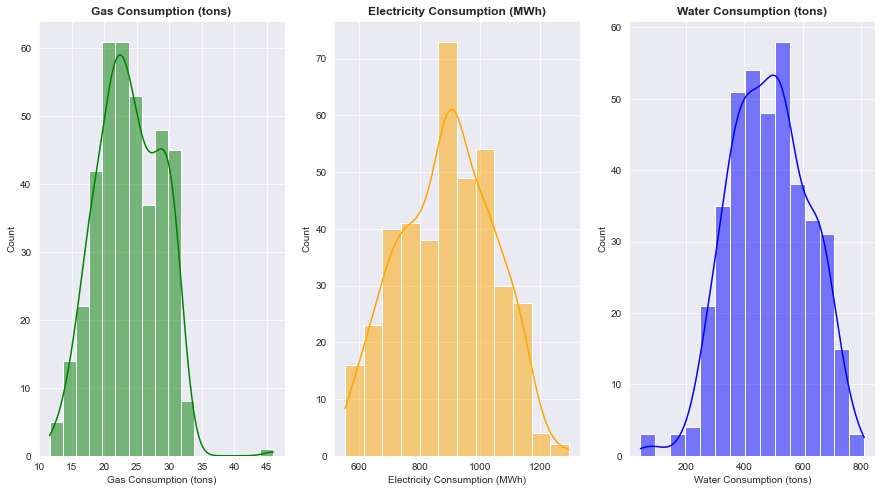

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(15, 8))

sns.histplot(new_df['Gas Consumption (tons)'], ax=ax[0], kde = True,color='green')
sns.histplot(new_df['Electricity Consumption (MWh)'], ax=ax[1], kde = True,color='orange')
sns.histplot(new_df['Water Consumption (tons)'], ax=ax[2], kde = True,color='blue')

ax[0].set_title(new_df.columns[0], fontweight='bold')
ax[1].set_title(new_df.columns[1], fontweight='bold')
ax[2].set_title(new_df.columns[2], fontweight='bold')

plt.show()

- We can from the histograms that all the features roughly follows a __normal distribution__/__gaussian distribution__

### Correlation Plot

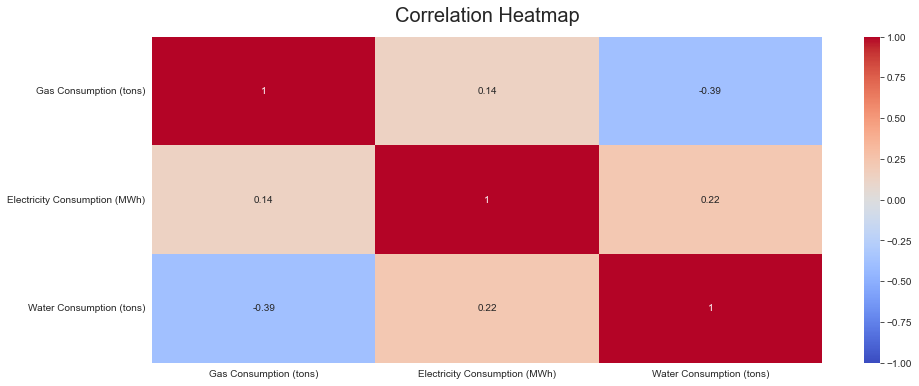

In [6]:
##Heatmap of Correlation
plt.figure(figsize=(15,6))
heatmap = sns.heatmap(new_df.corr(), vmin=-1, vmax=1, annot=True,cmap='coolwarm')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=15)

plt.show()


## Stationarity Tests


### Inspecting original time series for Stationarity



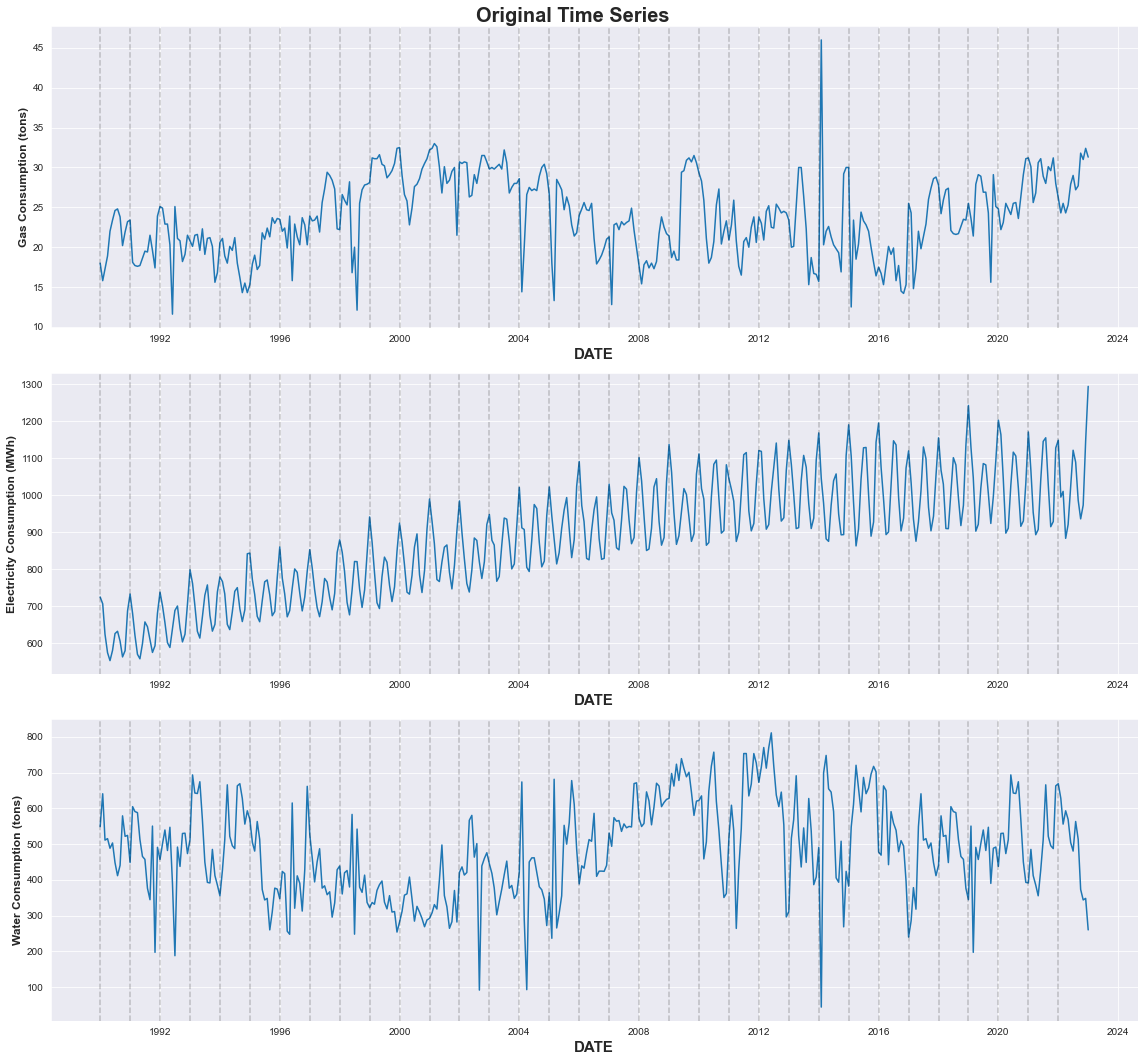

In [7]:
from datetime import datetime
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 15))

plt.suptitle('Original Time Series', fontsize=20, fontweight='bold')

for i, ax in enumerate(axes):
    ax.plot(new_df.index, new_df.iloc[:, i])
    ax.set_ylabel(new_df.columns[i], fontsize=12, fontweight='bold')
    for year in range(1990, 2023):
        ax.axvline(datetime(year, 1, 1), color='k', linestyle='--', alpha=0.2)
    ax.set_xlabel('DATE', fontsize=15, fontweight='bold')

plt.tight_layout()
plt.show()


Just Based on the Visual Test,
- Time series of __`Gas Consumption`__, it is quite obvious that there is __not really a trend__, and __constant variance__ except for the possible __anomaly around 2014__ which produced a spike. As for the __Covariance__, it is not as easy to tell whether it is constant

- We can see that the time series for __`Electricity Consumption`__ has __varying mean__ and __seasonality__ as it is increasing over time

- Time series of __`Water Consumption`__ has relatively __constant mean__ and __variance__. As for the __Covariance__, it is not as easy to tell whether it is constant

- Since the __seasonal and random fluctuations__ in the data remain quite constant in size over time, we can likely use an additive model for these time series

- We would have to include an ADF test to backup our observations on Stationarity of the 3 features


#### Looking at rolling variance of series 

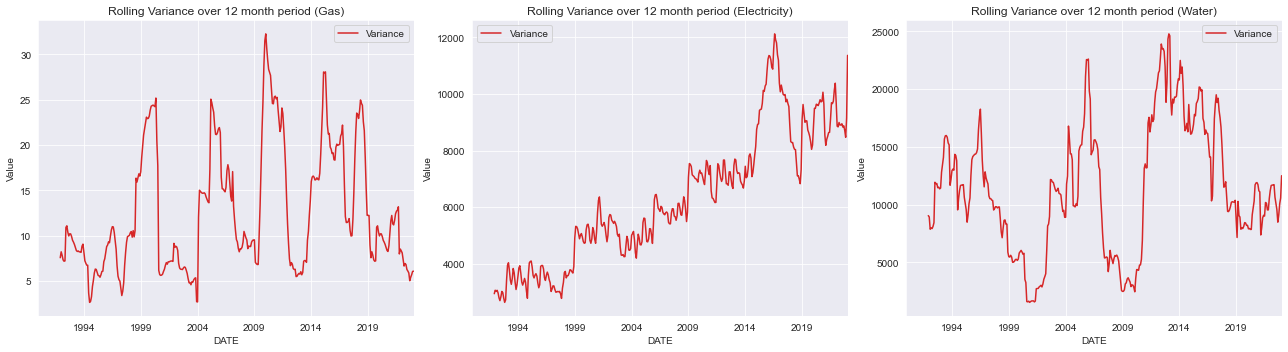

In [45]:
import matplotlib.pyplot as plt

# Create a subplot with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot the rolling variance and rolling mean for each column in separate subplots
new_df.iloc[:, 0].rolling(window=24).var().plot(ax=axes[0], color="tab:red", label="Variance")

axes[0].set_title("Rolling Variance over 12 month period (Gas)")
axes[0].set_ylabel("Value")
axes[0].legend()

new_df.iloc[:, 1].rolling(window=24).var().plot(ax=axes[1], color="tab:red", label="Variance")

axes[1].set_title("Rolling Variance over 12 month period (Electricity)")
axes[1].set_ylabel("Value")
axes[1].legend()

new_df.iloc[:, 2].rolling(window=24).var().plot(ax=axes[2], color="tab:red", label="Variance")

axes[2].set_title("Rolling Variance over 12 month period (Water)")
axes[2].set_ylabel("Value")
axes[2].legend()


plt.tight_layout()
plt.show()



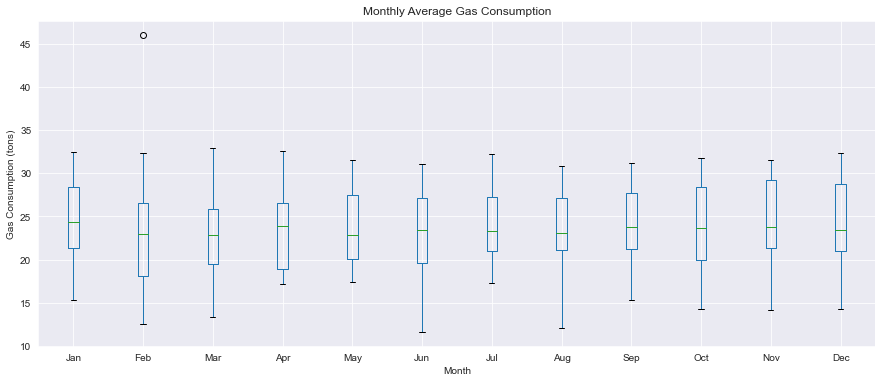

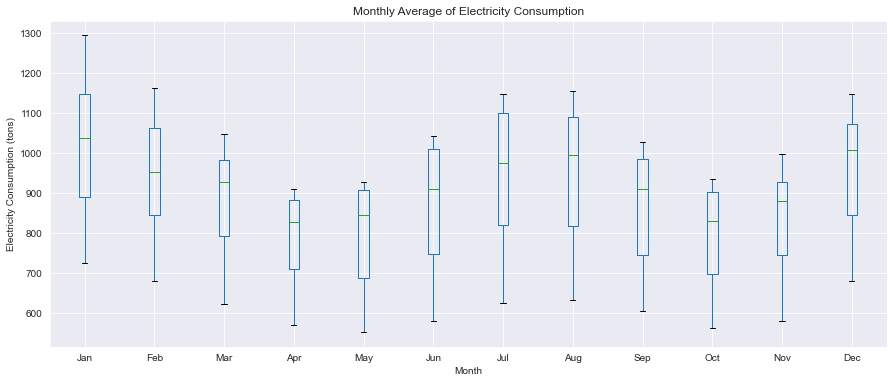

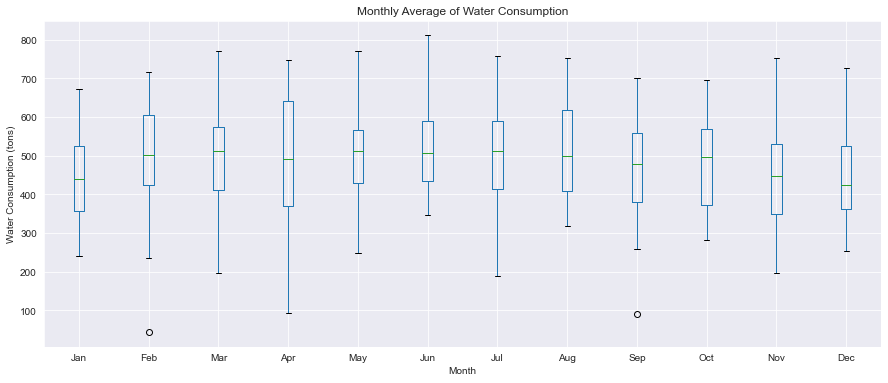

In [34]:
import pandas as pd

months =  ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Group by month and create separate boxplots for each month
fig, axes = plt.subplots(figsize=(15, 6))
for month, data in df.groupby(df['DATE'].dt.month):
    data.boxplot(column='Gas Consumption (tons)', ax=axes, positions=[month])
    

plt.xticks(range(1, 13), months)


axes.set_xlabel('Month')
axes.set_ylabel('Gas Consumption (tons)')
axes.set_title('Monthly Average Gas Consumption')

plt.show()

fig, axes = plt.subplots(figsize=(15, 6))
for month, data in df.groupby(df['DATE'].dt.month):
    data.boxplot(column='Electricity Consumption (MWh)', ax=axes, positions=[month])
    
# Set x-axis ticks and labels
plt.xticks(range(1, 13),  months)

# Set labels and title
axes.set_xlabel('Month')
axes.set_ylabel('Electricity Consumption (tons)')
axes.set_title('Monthly Average of Electricity Consumption')

plt.show()

fig, axes = plt.subplots(figsize=(15, 6))
for month, data in df.groupby(df['DATE'].dt.month):
    data.boxplot(column='Water Consumption (tons)', ax=axes, positions=[month])
    
# Set x-axis ticks and labels
plt.xticks(range(1, 13),  months)

# Set labels and title
axes.set_xlabel('Month')
axes.set_ylabel('Water Consumption (tons)')
axes.set_title('Monthly Average of Water Consumption')
plt.show()

- Boxplot of __Eletricity Consumption__ suggests seasonality, higher __consumptions__ in __Jan__ &  __Aug__ 
- There __may not__ be a strong seasonal pattern in __Gas & Water consumptions__ as __medians quite constant__

## Looking at anomalies/outliers


Upon doing some background research, the __abnormal spikes in Gas & Water Consumption in 2014__ was most likely caused by the __2014 North American cold wave/polar vortex__, an extreme weather event which caused unusually cold winter, and thus had significant impact on __Gas Consumption for heating purposes__ and __Water Consumption__ 

 This would support our reason of __dealing with the outlier in 2014 for Gas & Water Consumption__, which could __improve__ our models __performance__ since algorithms like __ARIMA__ are __sensitive to outliers__

The 2014 NA cold wave: (wikipedia)
- Formed	January 2, 2014
- Dissipated	April 10, 2014
- lasted roughly 3months


We would classify points __beyond 3 standard deviations__ from the mean score as __anomaly__ for the time series



#### Gas Consumption Anomaly
- Given the event's duration of approximately 3 months, I replaced the outlier with the corresponding value of the __3-month Simple Moving Average__ from the Gas Consumption dataset.

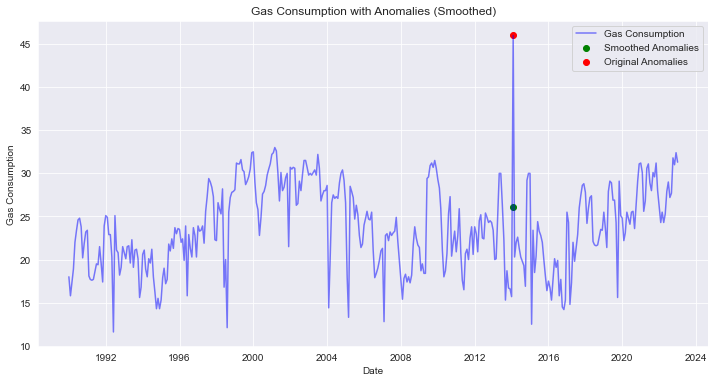

In [524]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Gas = new_df.iloc[:, 0]


z_scores = (Gas - Gas.mean()) / Gas.std()

# 3 standard deviations away 
std_3 = 3

# Find the index of anomaly data points
anomaly_indices = np.where(np.abs(z_scores) > std_3)[0]

# Calculate the 3-month SMA
sma_values = Gas.rolling(window=3).mean()

# replacing them with the 3-month SMA value
Gas_cleaned = Gas.copy()
Gas_cleaned.iloc[anomaly_indices] = sma_values[anomaly_indices]


plt.figure(figsize=(12, 6))
plt.plot(Gas.index, Gas, label='Gas Consumption', color='blue', alpha=0.5)


plt.scatter(Gas.index[anomaly_indices], Gas_cleaned[anomaly_indices], color='green', label='Smoothed Anomalies')


plt.scatter(Gas.index[anomaly_indices], Gas[anomaly_indices], color='red', label='Original Anomalies')

plt.xlabel('Date')
plt.ylabel('Gas Consumption')
plt.title('Gas Consumption with Anomalies (Smoothed)')
plt.legend()
plt.show()


### Water Consumption Anomaly
- Given the event's duration of approximately 3 months, I replaced the outlier with the corresponding value of the __3-month Simple Moving Average__ from the Gas Consumption dataset.

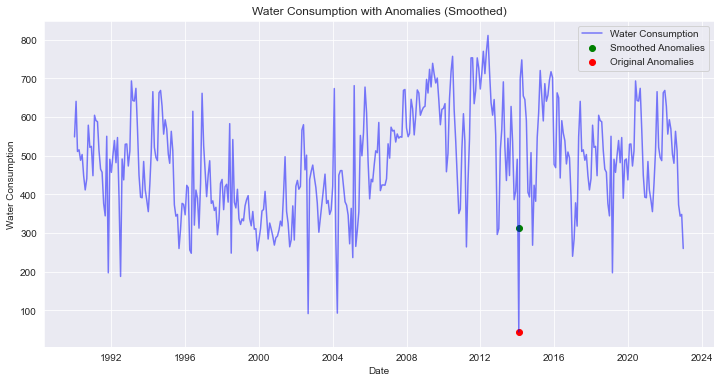

In [525]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Water = new_df.iloc[:,2]


z_scores = (Water - Water.mean()) / Water.std()

# 3 standard deviations away 
std_3 = 3

# Find the index of anomaly data points
anomaly_indices = np.where(np.abs(z_scores) > threshold)[0]

# Calculate the 3-month SMA
sma_values = Water.rolling(window=3).mean()

# replacing them with the 3-month SMA value
Water_cleaned = Water.copy()
Water_cleaned.iloc[anomaly_indices] = sma_values[anomaly_indices]


plt.figure(figsize=(12, 6))
plt.plot(Water.index, Water, label='Water Consumption', color='blue', alpha=0.5)


plt.scatter(Water.index[anomaly_indices], Water_cleaned[anomaly_indices], color='green', label='Smoothed Anomalies')


plt.scatter(Water.index[anomaly_indices], Water[anomaly_indices], color='red', label='Original Anomalies')

plt.xlabel('Date')
plt.ylabel('Water Consumption')
plt.title('Water Consumption with Anomalies (Smoothed)')
plt.legend()
plt.show()

### Updating New Dataframe with no outliers

In [355]:
import pandas as pd


Gas_df = pd.DataFrame(Gas_cleaned)
Water_df = pd.DataFrame(Water_cleaned)

selected_columns = new_df.drop(columns=['Gas Consumption (tons)', 'Water Consumption (tons)'])

new_df = pd.concat([Gas_df, selected_columns, Water_df], axis=1)

new_df


Gas Consumption (tons)  Electricity Consumption (MWh)  \
DATE                                                                
1990-01-01                    18.0                          725.1   
1990-02-01                    15.8                          706.7   
1990-03-01                    17.3                          624.5   
1990-04-01                    18.9                          574.7   
1990-05-01                    22.0                          553.2   
...                            ...                            ...   
2022-09-01                    27.7                          986.2   
2022-10-01                    31.8                          936.1   
2022-11-01                    31.0                          973.4   
2022-12-01                    32.4                         1147.2   
2023-01-01                    31.3                         1294.0   

            Water Consumption (tons)  
DATE                                  
1990-01-01                     548.8  
1990-02-01                     640.7  
1990-03-01                     511.1  
1990-04-01                     515.3  
1990-05-01                     488.4  
...                              ...  
2022-09-01                     513.3  
2022-10-01                     373.1  
2022-11-01                     343.9  
2022-12-01                     348.3  
2023-01-01                     260.2  

[397 rows x 3 columns]

### Looking at Simple Moving Averages of Series
- We will look at __2 SMAs__ , __24month and 12months__
- The __SMA_24__ would produce a __smoother__ result than the __SMA_12__ 
- However, more information would be lost for the __SMA_24__ as compared to __SMA_12__

In [13]:
# Simple moving average functions
def SMA(data):
    # Plotting the original data
    ax = data.plot(figsize=(15, 7),alpha=0.4)

    # Calculating and plotting SMA_6
    data.rolling(window=12).mean().plot(ax=ax, linestyle='-',label='SMA_12')


    # Calculating and plotting SMA_12
    data.rolling(window=24).mean().plot(ax=ax, linestyle='--' ,label='SMA_24')

    # Adding labels and legend
    ax.set_xlabel('Date',fontsize=12,fontweight='bold')
    ax.set_ylabel('Value',fontsize=12,fontweight='bold')
    plt.suptitle('24 and 12 months SMA ')
    plt.legend()

    # Displaying the plot
    plt.show()


### Observations
- For the __Gas Consumption__, there is an __increasing trend__ from __~ 1995 - 2001__
- I noticed a similar trend maybe repeating again from __~2017 to 2023__, possibly __peaking__ in the next 2 years, possible __Cyclical period of 20 years__



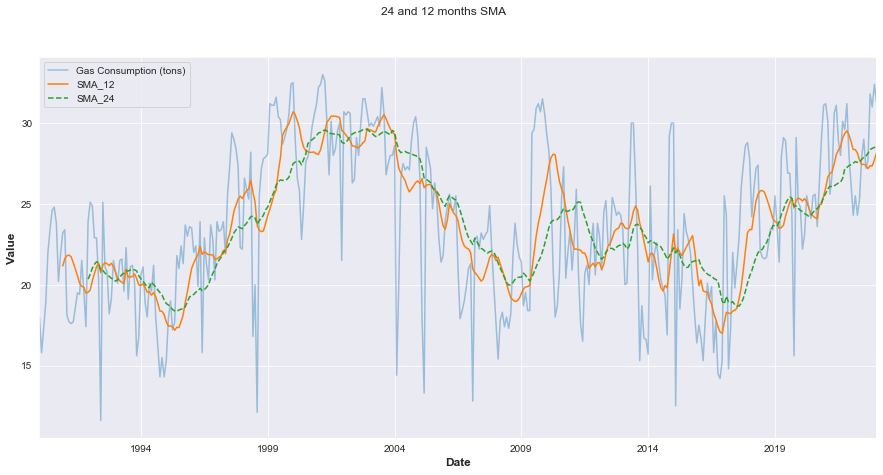

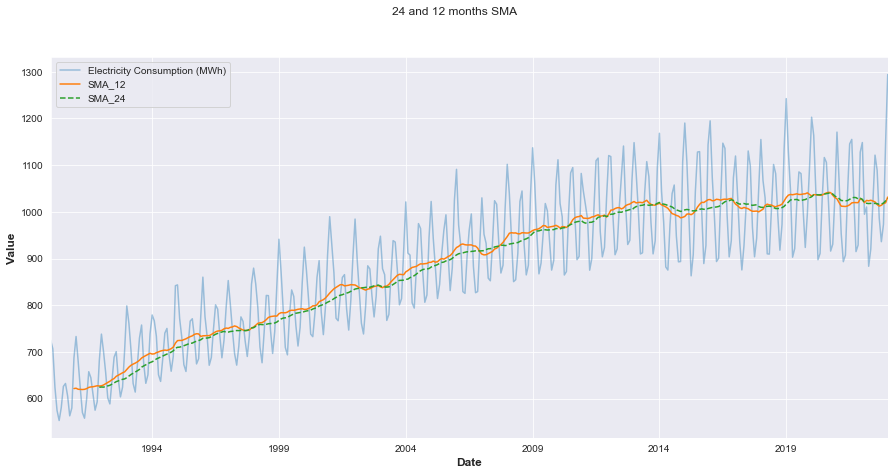

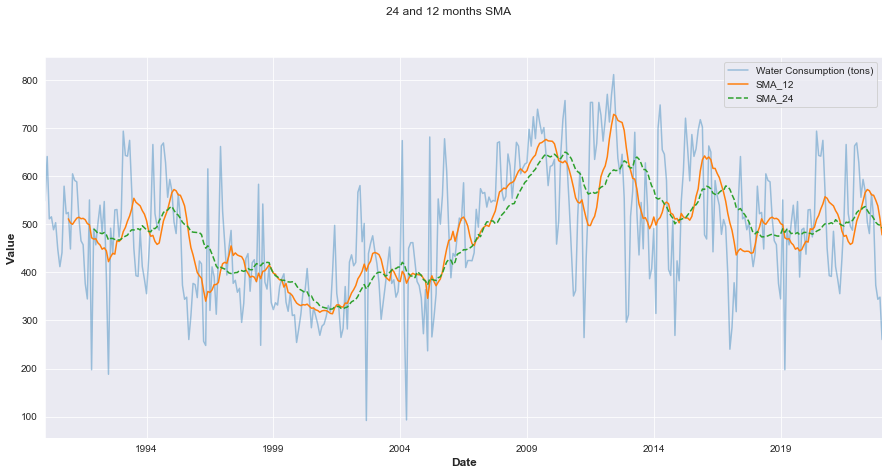

In [14]:
SMA(new_df.iloc[:,0])
SMA(new_df.iloc[:,1])
SMA(new_df.iloc[:,2])



### Summary Statistics (mean, variance)
- If the __mean and variance__ between the 2 groups are quite __different__, then the series most likely is __not stationary__
- For __`Gas Consumption`__, it the __mean__ between 2 groups were quite __similar__,but the __variance__ was not so it could be  __non-stationary__
- For __`Electricity Consumption`__, it the __variances and mean__ between 2 groups were quite __different__, so it could be __non-stationary__
- For __`Water Consumption`__, it the __variances and mean__ between 2 groups were quite __different__, so it could be __non-stationary__

In [15]:
series = new_df.copy()
for i in range(len(series.columns)):
    
    
    X = series.iloc[:,i].values
    split = round(len(X) / 2)
    X1, X2 = X[0:split], X[split:]
    
    mean1, mean2 = X1.mean(), X2.mean()
    var1, var2 = X1.var(), X2.var()
    
    print(f'{series.columns[i]} \n')
    print('mean1=%f, mean2=%f' % (mean1, mean2))
    print('variance1=%f, variance2=%f' % (var1, var2), '\n')

Gas Consumption (tons) 

mean1=24.282828, mean2=23.189950
variance1=24.359301, variance2=20.555477 

Electricity Consumption (MWh) 

mean1=774.035859, mean2=1002.334171
variance1=12147.302805, variance2=9037.976320 

Water Consumption (tons) 

mean1=426.866667, mean2=544.105528
variance1=13052.515758, variance2=15010.797407 



## ADF Test for Stationarity

### Using ADF to check for presence of a unit root, which implies non-stationarity

#### __`Null Hypothesis`__: The series is __non-stationary__ / has a unit root (p > 0.05)
#### __`Alternate Hypothesis`__: The series __is stationary__ / no unit root (p < 0.05)


- In this test,  __Gas consumption__(p=0.0108) and __Water consumption__(p≈0) p-values were __< 0.05__, therefore we do not __reject__ the __null hypothesis__ .Both features have a unit root. 

- Time series is implied to be __stationary__ for __Gas and Water consumption__ based on the ADF test
- However, the p-value(0.186) for __Electricity Consumption > 0.05__. Therefore, we __do not reject the null hypothesis__, the data has 
a unit root and is implied to be __non-stationary__
- This means we may need to perform __Differencing__ for __Electricity Consumption series__

In [526]:

from statsmodels.tsa.stattools import adfuller
def adftest(df,i=0):
    test = adfuller(df.iloc[:,i])
    print(f'number of observation for {df.columns[i]} :', test[3], '\np-value', round(test[1],4))
    
    
adftest(new_df,0)

adftest(new_df,1)

adftest(new_df,2)



number of observation for Gas Consumption (tons) : 390 
p-value 0.0108
number of observation for Electricity Consumption (MWh) : 381 
p-value 0.1862
number of observation for Water Consumption (tons) : 392 
p-value 0.0001


## KPSS test for Stationarity

### Using KPSS for presence of trend in time series

-  __`Null hypothesis`__: The series is __stationary__ / no unit root (p >0.05)
-  __`Alternative hypothesis`__: The series is __non-stationary__ /has a unit root (p < 0.05)

#### Summary From ADF and KPSS
- For __Gas consumption__, we observe that __ADF__ indicates __stationary__ and __KPSS__ indicates __stationary__. However earlier, __summary statistics__ shows their __variance__ to be not similar, so it might not be stationary.
- For __Water consumption__,we observe that __ADF__ indicates __stationary__ (p=0 < 0.05) and __KPSS__ indicates __non-stationary__ (p=0.01 < 0.05), meaning that the series is __difference stationary__
- For __Electricity consumption__, we observe that __ADF__ is __non-stationary__ and the __KPSS__ indicates __non-stationary__, meaning that the series is __not stationary__

#### This suggests that we need to perform __differencing__ for __Electricity consumption__ and __Water consumption__

In [17]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
from statsmodels.tsa.stattools import kpss
## kpss test function that takes in a time series df
def kpss_test(timeseries):
    print (f'Results of KPSS Test {timeseries.name}:')
    kpsstest = kpss(timeseries, nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','**p-value**','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s) '%key] = value
    print (kpss_output,'\n')

In [19]:
##For 
kpss_test(new_df.iloc[:,0])

kpss_test(new_df.iloc[:,1])

kpss_test(new_df.iloc[:,2])

Results of KPSS Test Gas Consumption (tons):
Test Statistic             0.331479
**p-value**                0.100000
#Lags Used                10.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64 

Results of KPSS Test Electricity Consumption (MWh):
Test Statistic             3.531601
**p-value**                0.010000
#Lags Used                10.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64 

Results of KPSS Test Water Consumption (tons):
Test Statistic             0.860072
**p-value**                0.010000
#Lags Used                10.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64 



## Time Series Decomposition 
- __Additive__ (Data = Trend + Seasonal + Random)
- __Multiplicative__ (Data = Trend * Seasonal * Random)





In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
#Differencing function for reuse

def Additive_decompose(feature):
    
    result = seasonal_decompose(feature, model='additive')
    res = result.plot()
    res.set_size_inches((15,7))
    res.suptitle('Additive Decomposition', fontsize=15)
    plt.show()
    
def Multi_decompose(feature):
    result = seasonal_decompose(feature, model='multiplicative')
    res = result.plot()
    res.set_size_inches((15,7))
    res.suptitle('Multiplicative Decomposition', fontsize=15)
    plt.show()
    
    
def Compare_decompose(feature):
    Additive_decompose(feature)
    Multi_decompose(feature)
   

### Decomposition for Gas Consumption (tons)
- We can observe from the __Residual plot__ that there is an __outlier around 2014__

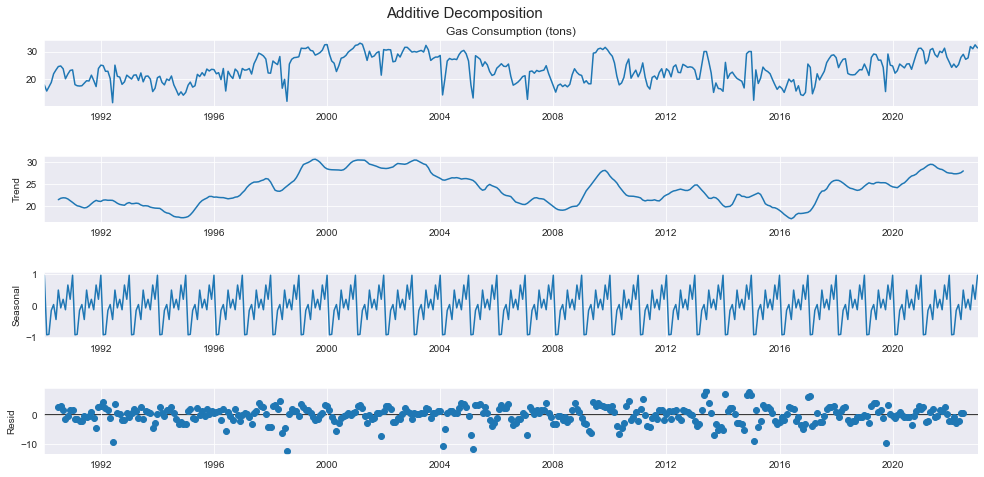

In [128]:
Additive_decompose(new_df.iloc[:,0].dropna())


### Decomposition for Electricity Consumption (MWh)

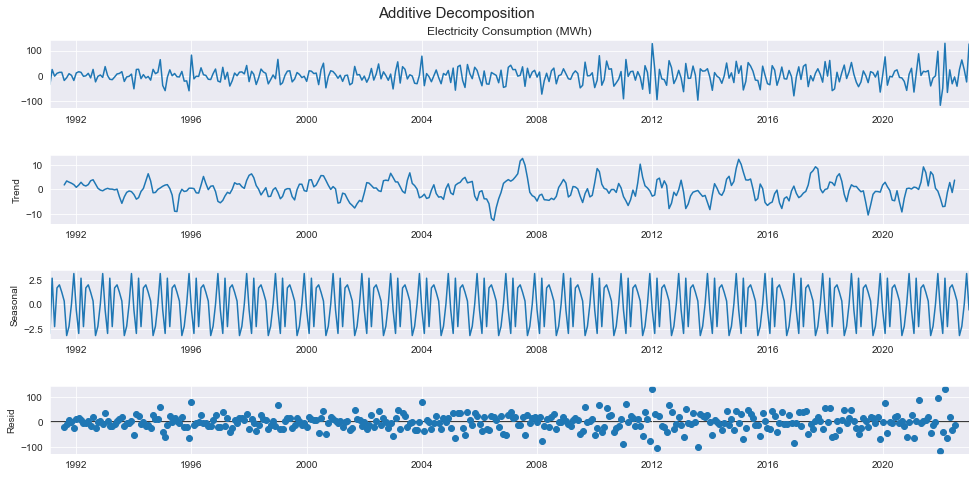

In [130]:
Additive_decompose(new_df.iloc[:,1])

### Decomposition for Water Consumption (tons)

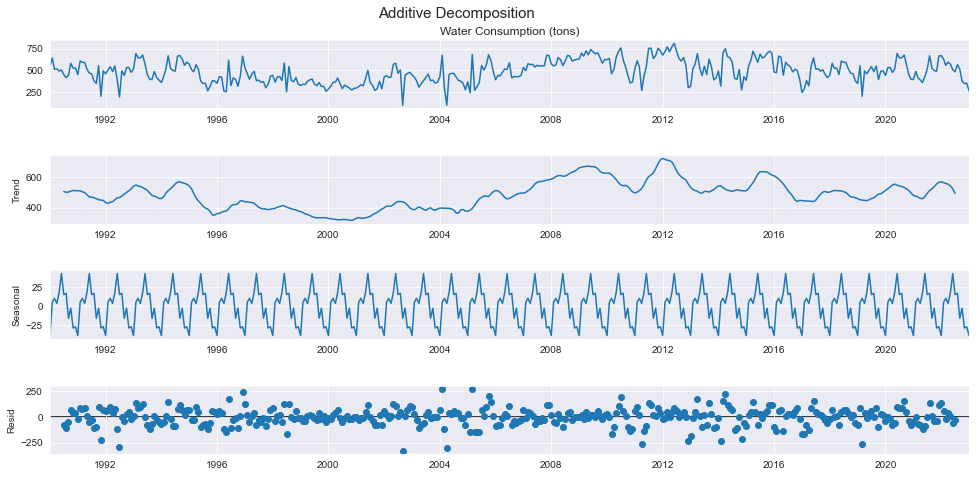

In [135]:
Additive_decompose(new_df.iloc[:,2])


### Differencing for Electricity & Water Consumption (tons)


In [24]:
from statsmodels.tsa.statespace.tools import diff
## Differencing function K=1, K=2 comparison
def diff_1_2(df):

    df_diff1 =diff(df, k_diff=1)
    df_diff2 =diff(df, k_diff=2)
    result1 = adfuller(df_diff1)
    result2 = adfuller(df_diff2)

    fig, ax = plt.subplots(1, 3, figsize=(20, 5))
    df.plot(ax=ax[0])
    df_diff1.plot(ax=ax[1])
    df_diff2.plot(ax=ax[2])
    ax[0].set_title('Time Series Before Differencing')
    ax[1].set_title('Time Series After Differencing (k=1)')
    ax[2].set_title('Time Series After Differencing (k=2)')
    plt.suptitle(df.name, fontweight='bold')
    plt.show()
    print(f'ADF (k=1):{round(result1[1],4)} ADF (k=2):{round(result2[1],4)}')
    kpss_test(df_diff1),kpss_test(df_diff2)

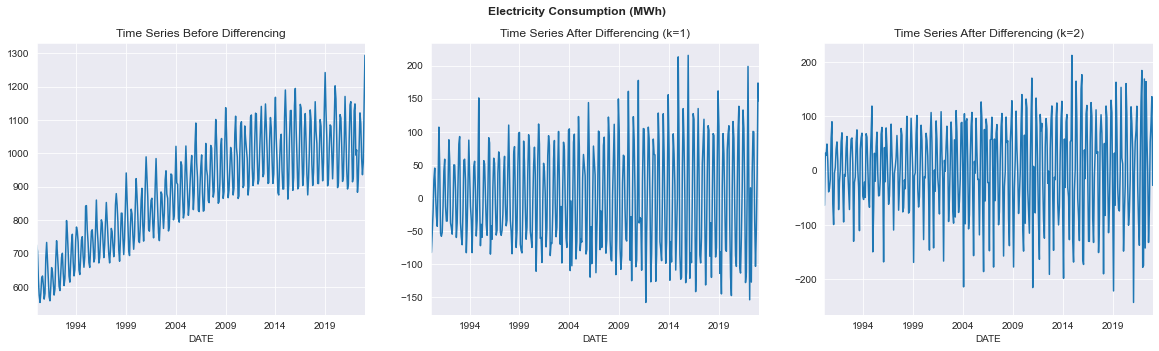

ADF (k=1):0.0 ADF (k=2):0.0
Results of KPSS Test Electricity Consumption (MWh):
Test Statistic             0.145191
**p-value**                0.100000
#Lags Used                34.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64 

Results of KPSS Test Electricity Consumption (MWh):
Test Statistic             0.045274
**p-value**                0.100000
#Lags Used                32.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64 



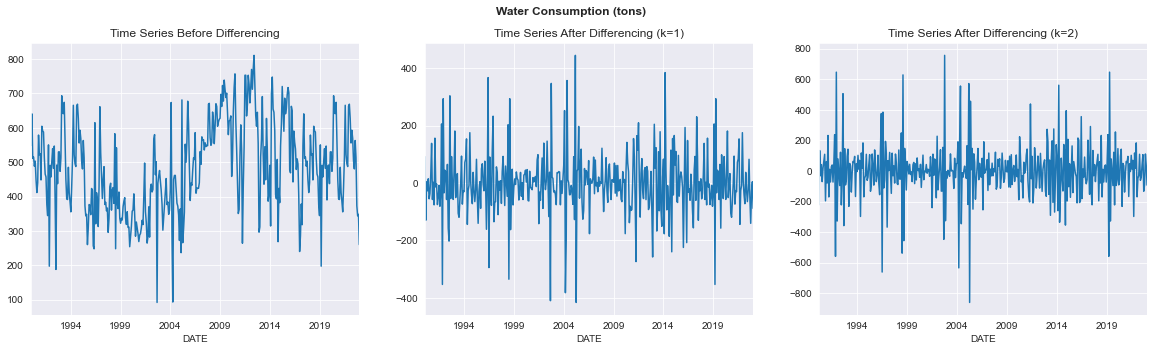

ADF (k=1):0.0 ADF (k=2):0.0
Results of KPSS Test Water Consumption (tons):
Test Statistic             0.111267
**p-value**                0.100000
#Lags Used                40.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64 

Results of KPSS Test Water Consumption (tons):
Test Statistic             0.118432
**p-value**                0.100000
#Lags Used                85.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64 



In [46]:
diff_1_2(new_df.iloc[:,1])
diff_1_2(new_df.iloc[:,2])


# Building Time Series Models

- We can see that just performing __first order differencing__ is enough to make both time series __stationary__ as proven by the ADF and KPSS tests on the differenced series

### Splitting Train and Test
- For this dataset, it ranges from __1 Jan 1990 to 1 Jan 2023__ (33 Years)
- I wanted to go for a 90 - 10 split, so i took 0.9 x 33 = 29.7 = 29 (rounded down)
- To find the split date, i added 1990 + 29 = 2019

In [394]:
def train_test_split(data):
    split_date = '2019-01-01' 

    # Splitting the dataset into train and test sets
    train_data = data.loc[data.index < split_date]
    test_data = data.loc[data.index >= split_date]
    
    return train_data,test_data

In [395]:
Gas_train,Gas_test = train_test_split(new_df.iloc[:,0])
Electricity_train,Electricity_test= train_test_split(new_df.iloc[:,1])
Water_train,Water_test= train_test_split(new_df.iloc[:,2])


## Holt-Winters Exponential Smoothing for Non-stationary series

### Holt-Winters Exponential Smoothing for Electricity Consumption

- Holt-Winters Exp Smoothing is more appropriate for non-stationary data, being able to capture trends and seasonality in the data, which the Electricity Consumption Feature have both
- Since __Electricity Consumption__ has both __trend__(magnitude remains quite constant) and __seasonality__, we can set them to __"add"__
- The Train(2.04%) and Test(3.69%) MAPE can show that the Holt-Winters Exponential Smoothing Model is a good fit for this time series

MAPE - Training: 2.04%
MAPE - Testing: 3.69%


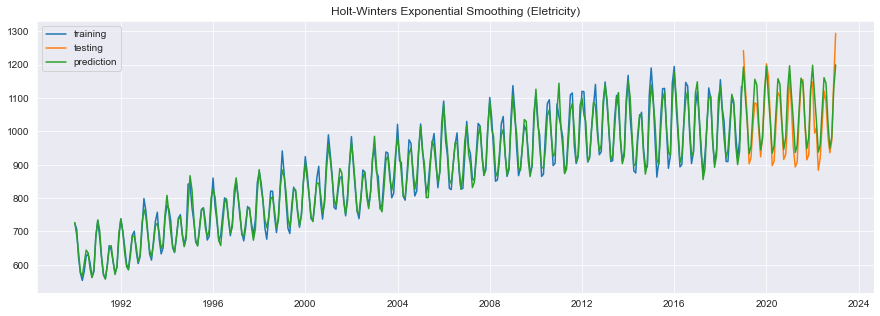

In [527]:
# Exponential Smoothing Model
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
from sklearn.metrics import mean_absolute_percentage_error
es_model = HWES(Electricity_train, seasonal_periods=12, trend='add', seasonal='add',damped_trend=True, freq='MS').fit()
pred_es = es_model.predict(start='1990-01-01', end='2023-01-01')
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(Electricity_train, label='training')
ax.plot(Electricity_test, label='testing')
ax.plot(pred_es, label='prediction')
plt.legend()
plt.title('Holt-Winters Exponential Smoothing (Eletricity)')

# Calculate MAPE for training data
mape_train_elec_es= mean_absolute_percentage_error(Electricity_train, pred_es[:len(Electricity_train)])

# Calculate MAPE for testing data
mape_test_elec_es = mean_absolute_percentage_error(Electricity_test, pred_es[len(Electricity_train):])

# Print MAPE for training and testing
print(f"MAPE - Training: {mape_train_elec_es * 100:.2f}%")
print(f"MAPE - Testing: {mape_test_elec_es * 100:.2f}%")

plt.show()



### Holt-Winters Exponential Smoothing for Water Consumption
- We can try to use Holt-Winters Exp Smoothing model again for Water Consumption as it is non-stationary
- The Train(22.22%) and Test(19.47%) MAPE can show that the Holt-Winters Exponential Smoothing Model is a not as good a fit for this time series
- One possible reason could be due to Water Consumption exhibiting seasonality but not trend, which could cause the model to not perform as well
- We should try to look at a ARIMA/SARIMA model for Water Consumption

MAPE - Training: 19.16%
MAPE - Testing: 19.13%


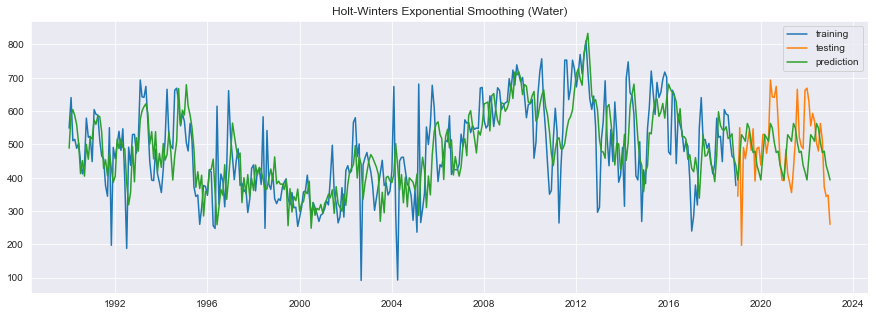

In [468]:
# Exponential Smoothing Model
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
from sklearn.metrics import mean_absolute_percentage_error
es_model = HWES(Water_train, seasonal_periods=12, seasonal='add' ,freq='MS').fit()
pred = es_model.predict(start='1990-01-01', end='2023-01-01')
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(Water_train, label='training')
ax.plot(Water_test, label='testing')
ax.plot(pred, label='prediction')
plt.legend()
plt.title('Holt-Winters Exponential Smoothing (Water)')

# Calculate MAPE for training data
mape_train_water = mean_absolute_percentage_error(Water_train, pred[:len(Water_train)])

# Calculate MAPE for testing data
mape_test_water = mean_absolute_percentage_error(Water_test, pred[len(Water_train):])

# Print MAPE for training and testing
print(f"MAPE - Training: {mape_train_water * 100:.2f}%")
print(f"MAPE - Testing: {mape_test_water * 100:.2f}%")

plt.show()




## Model Building for Gas Consumption

### ACF & PACF For Gas Consumption 
- In the __ACF__, the lags slowly decay very slowly (>50 lags), meaning future values of the series are __correlated/heavily affected__ by past values
- Possible causes could be __Long memory Times Series__ or underlying __seasonality__, as the series doesn't seem to exhibit a __trend__ as shown earlier
- Most likely cause would be Gas Consumption being a __long memory time series__ since __ADF & KPSS__ already concludes __stationary__ 
- I wanted to try the __ARFIMA__ model which seems to deal better with __Long memory series__ but statmodels does not offer that


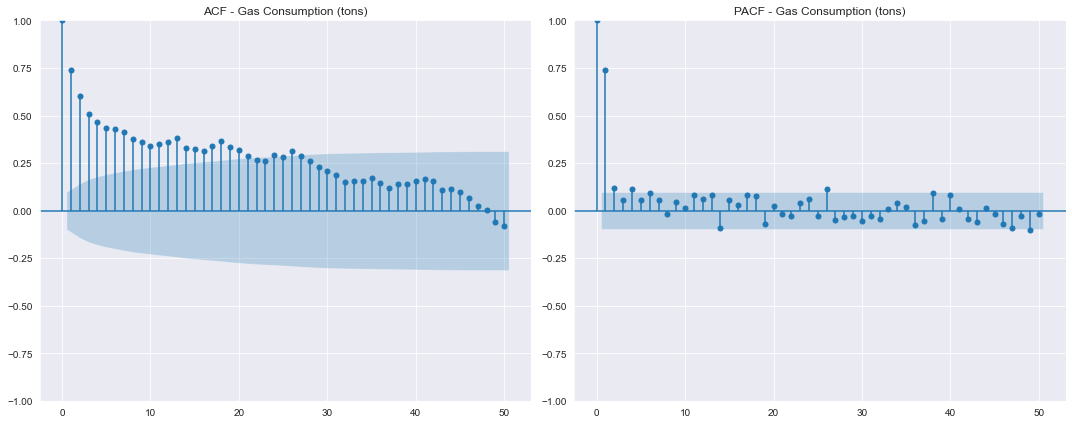

In [65]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

series2 = new_df.copy()
gas_df = series2.iloc[:,0]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plotting ACF
plot_acf(gas_df, ax=ax1, lags=50)
ax1.set_title(f'ACF - {series2.columns[0]}')

# Plotting PACF
plot_pacf(gas_df, ax=ax2, method='ywm', lags=50)
ax2.set_title(f'PACF - {series2.columns[0]}')

plt.tight_layout()
plt.show()




#### ACF & PACF of Seasonal Component for Gas Consumption
- It was not as easy to infer the __seasonal periods__ from the __ACF and PACF__ above
- I wanted to find the __seasonal period__ which can be found from the __seasonal component__ to perform __seasonal differencing__
- From the __ACF__ below, we can see __significant lags at 12, 24,36...__, suggesting a __seasonal period of 12__



Text(0.5, 1.0, 'PACF - Gas Consumption (tons) (Seasonal Component)')

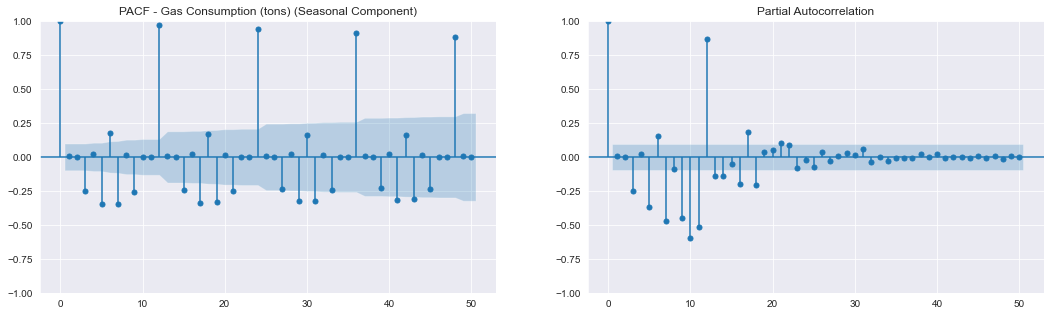

In [ ]:
series = new_df.copy()

# Calculate seasonal components using seasonal_decompose
gas_seasonal = seasonal_decompose(series.iloc[:, 0], model='additive').seasonal

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))

# Plotting ACF for seasonal components
plot_acf(gas_seasonal, ax=ax1,lags=50)
ax1.set_title(f'ACF - {series.columns[0]} (Seasonal Component)')

# Plotting PACF for seasonal components
plot_pacf(gas_seasonal, ax=ax2, method='ywm',lags=50)
ax1.set_title(f'PACF - {series.columns[0]} (Seasonal Component)')


#### ACF & PACF with Seasonal Difference of 12 for Gas Consumption
- We can observe a quicker decay/tail-off to 0 now in the __ACF__, after the __7th lag__
- However, there seems to be a __sine like__ pattern in the __ACF__, suggesting __long stationary process__ or __cyclical patterns__ 
- From the __PACF__ there were significant positive lags at lags 1,13,25 which may suggest both __AR__ & __Seasonal AR terms__ (p = 1,2, P = 2)
- Since we perform __seasonal differencing__ (D=1) 
- we would have a __`SARIMA(2,0,0)(2,1,0,12)`__ model as a starting point
- also, we'll fit __Water consumption as an exogenous variable__ since they are on the same scale and have a __negative correlation__


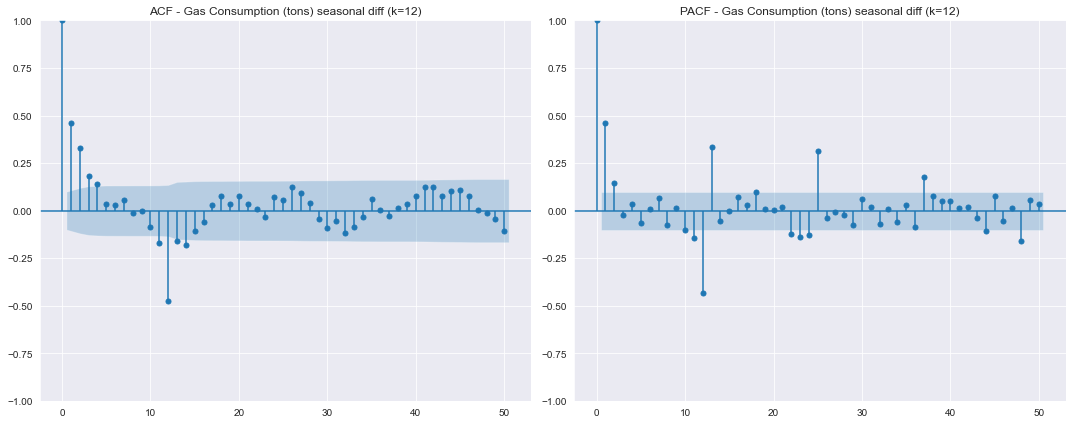

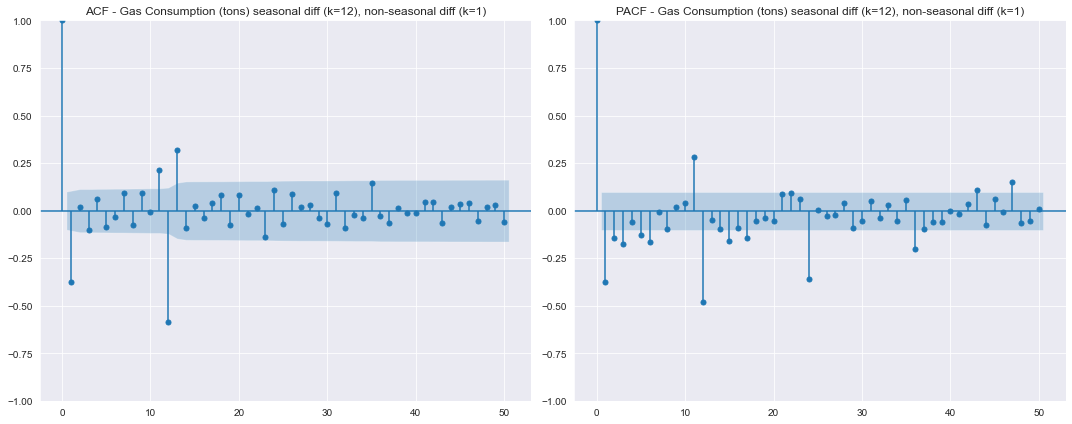

In [278]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
gas_df=new_df.iloc[:,0]
seasonal_diff_gas = gas_df.diff(12).dropna()

# Plotting ACF
plot_acf(seasonal_diff_gas, ax=ax1, lags=50)
ax1.set_title(f'ACF - {series2.columns[0]} seasonal diff (k=12)')

# Plotting PACF
plot_pacf(seasonal_diff_gas, ax=ax2, method='ywm', lags=50)
ax2.set_title(f'PACF - {series2.columns[0]} seasonal diff (k=12)')

plt.tight_layout()
plt.show()

# Create new subplots for the second set of plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plotting ACF
plot_acf(seasonal_diff_gas.diff(1).dropna(), ax=ax1, lags=50)
ax1.set_title(f'ACF - {series2.columns[0]} seasonal diff (k=12), non-seasonal diff (k=1)')

# Plotting PACF
plot_pacf(seasonal_diff_gas.diff(1).dropna(), ax=ax2, method='ywm', lags=50)
ax2.set_title(f'PACF - {series2.columns[0]} seasonal diff (k=12), non-seasonal diff (k=1)')

plt.tight_layout()
plt.show()



### Looking at Test and Predicted values for __SARIMA (2,0,0) , (2,1,0,12)__

The results:
- __AIC : 1791__
- __BIC : 1814__
- __MAPE train score of 15.91%__ 
- __MAPE test score of 17.66%__

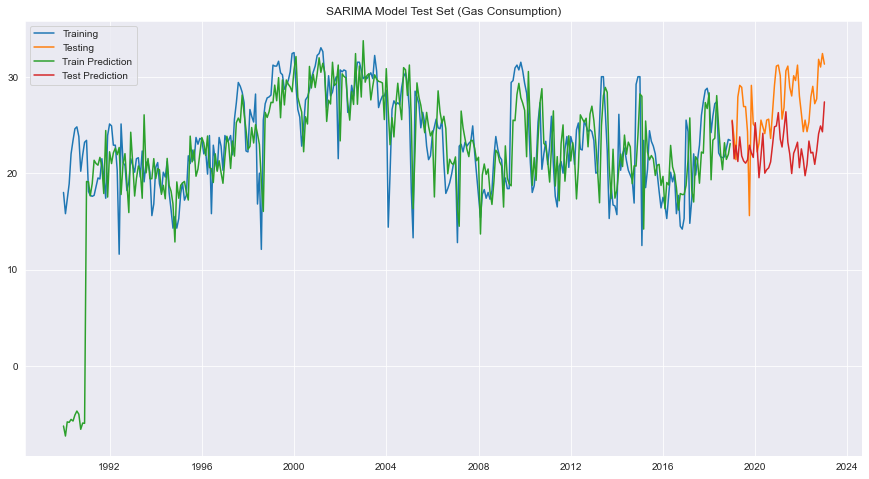

MAPE - Train: 15.91%
MAPE - Testing: 17.66%


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:             Gas Consumption (tons)   No. Observations:                  348
Model:             SARIMAX(2, 0, 0)x(2, 1, 0, 12)   Log Likelihood                -889.720
Date:                            Fri, 11 Aug 2023   AIC                           1791.440
Time:                                    15:42:18   BIC                           1814.343
Sample:                                01-01-1990   HQIC                          1800.570
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Water Consumption (tons)    -0.0113      0.001     -8.153      0.000      -0.014      -0.009
ar.L1                        0.6854      0.044     15.443      0.000       0.598       0.772
ar.L2                       -0.0048      0.047     -0.104      0.917      -0.096       0.086
ar.S.L12                    -0.6619      0.048    -13.812      0.000      -0.756      -0.568
ar.S.L24                    -0.3160      0.051     -6.219      0.000      -0.416      -0.216
sigma2                      11.4538      0.707     16.197      0.000      10.068      12.840
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.73
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.65   Skew:                            -0.38
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [494]:
# SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model_gas = SARIMAX(Gas_train, order=(2, 0, 0), seasonal_order=(2, 1, 0, 12), exog=Water_train).fit()
gas_pred_test = sarima_model_gas.get_prediction(start='2019-01-01', end='2023-01-01', exog=Water_test).predicted_mean
gas_pred_train = sarima_model_gas.get_prediction(start='1990-01-01', end='2018-12-01', exog=Water_train).predicted_mean

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(Gas_train, label='Training')
ax.plot(Gas_test, label='Testing')
ax.plot(gas_pred_train, label='Train Prediction')
ax.plot(gas_pred_test, label='Test Prediction')
plt.legend()
plt.title('SARIMA Model Test Set (Gas Consumption)')
plt.show()

# Calculate MAPE for train and testing data
gas_mape_train = mean_absolute_percentage_error(Gas_train, gas_pred_train)
print(f"MAPE - Train: {gas_mape_train*100:.2f}%")

gas_mape_test = mean_absolute_percentage_error(Gas_test, gas_pred_test)
print(f"MAPE - Testing: {gas_mape_test*100:.2f}%")

sarima_model_gas.summary()


### ACF analysis of Residuals
- Larger __ACF__ values indicate stronger autocorrelation at those lags
- A high __Q-statistic__ suggests that the residuals are not independently distributed and may exhibit significant autocorrelation
- A __low p-value__ indicates evidence to reject the null hypothesis of no autocorrelation

- Below, Q-statistic values are quite large and the  p-values are extremely close to zero, this suggest __significant autocorrelation__ in the residuals of our __SARIMA (2,0,0) , (2,1,0,12)__
- This could suggest a need for __non-seasonal differencing__

In [495]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA


resid = sarima_model_gas.resid

r, q, p = sm.tsa.acf(resid.values.squeeze(), fft=True, qstat=True)
r = r[1:25]
q = q[1:25]
p = p[1:25]

data = np.column_stack((np.arange(1, 25), r, q, p))

table = pd.DataFrame(data, columns=["lag", "AC", "Q", "Prob(>Q)"])
print(table.set_index("lag"))



            AC           Q       Prob(>Q)
lag                                      
1.0   0.635275  260.854246   2.271016e-57
2.0   0.581896  355.660052   8.873086e-77
3.0   0.518207  437.188603   2.554596e-93
4.0   0.479855  490.590743  8.572838e-104
5.0   0.387795  530.989322  1.768019e-111
6.0   0.336800  559.901713  1.044474e-116
7.0   0.284509  570.567779  4.954917e-118
8.0   0.172551  578.078700  1.058724e-118
9.0   0.144585  580.258376  2.983027e-118
10.0  0.077773  580.932410  1.674791e-117
11.0  0.043185  581.446086  9.689702e-117
12.0 -0.037644  581.777412  5.863802e-116
13.0  0.030187  581.846095  3.873297e-115
14.0 -0.013724  581.866136  2.521591e-114
15.0  0.007402  582.215212  1.349120e-113
16.0 -0.030846  582.281872  8.016275e-113
17.0  0.013459  582.329133  4.661005e-112
18.0  0.011316  582.338669  2.680468e-111
19.0 -0.005075  582.559838  1.353170e-110
20.0  0.024405  582.610028  7.230303e-110
21.0  0.011608  582.699305  3.697850e-109
22.0 -0.015458  582.701992  1.9257

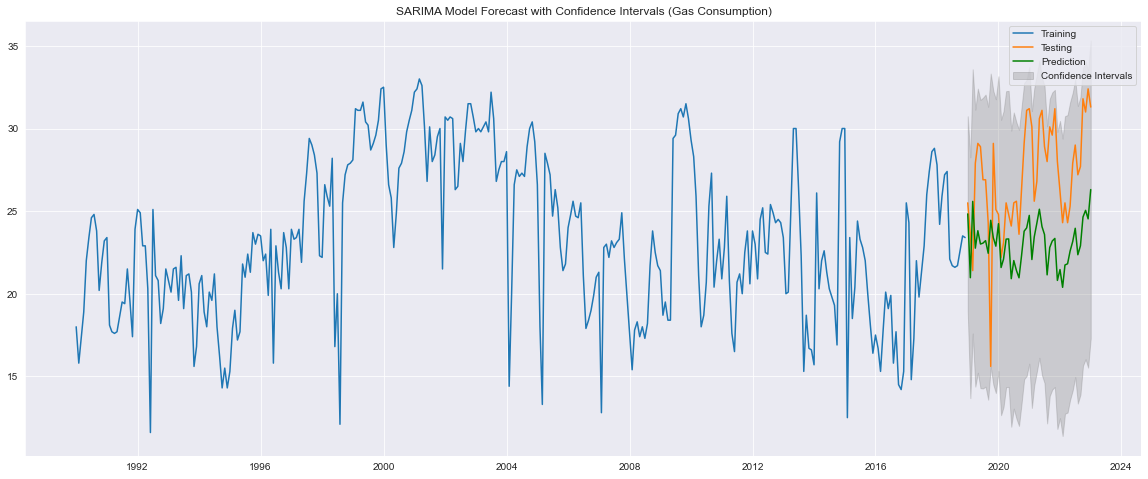

MAPE - Training: 14.60%
MAPE - Testing: 16.58%


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:             Gas Consumption (tons)   No. Observations:                  348
Model:             ARIMA(2, 0, 0)x(2, 1, [1], 12)   Log Likelihood                -861.080
Date:                            Fri, 11 Aug 2023   AIC                           1736.160
Time:                                    12:39:27   BIC                           1762.879
Sample:                                01-01-1990   HQIC                          1746.811
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Water Consumption (tons)    -0.0118      0.001     -9.285      0.000      -0.014      -0.009
ar.L1                        0.7231      0.048     15.131      0.000       0.629       0.817
ar.L2                        0.0329      0.047      0.703      0.482      -0.059       0.125
ar.S.L12                     0.0354      0.054      0.651      0.515      -0.071       0.142
ar.S.L24                     0.0211      0.067      0.314      0.754      -0.111       0.153
ma.S.L12                    -0.9511      0.078    -12.190      0.000      -1.104      -0.798
sigma2                       9.0323      0.653     13.822      0.000       7.752      10.313
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               145.82
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               1.48   Skew:                            -0.41
Prob(H) (two-sided):                  0.04   Kurtosis:                         6.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [196]:
# SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Fit the SARIMA model to the training data
#sarima_model_gas = SARIMAX(Gas_train2, order=(1, 1, [0,1]), seasonal_order=(2, 1, 0, 12)).fit()
# sarima_model_gas = SARIMAX(Gas_train2, order=(2, 0, 1), seasonal_order=(2, 1, 0, 12)).fit()

sarima_model_gas = ARIMA(Gas_train, order=(2,0,0),seasonal_order=(2,1,1,12),exog=Water_train).fit()
# Get the forecast and confidence intervals for the test data period
forecast = sarima_model_gas.get_forecast(steps=len(Gas_test),exog=Water_test)
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot the original time series, training data, testing data, and prediction
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(Gas_train, label='Training')
ax.plot(Gas_test, label='Testing')
ax.plot(Gas_test.index, predicted_mean, color='green', label='Prediction')

# Fill between the confidence intervals
ax.fill_between(Gas_test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=0.3, label='Confidence Intervals')

plt.legend()
plt.title('SARIMA Model Forecast with Confidence Intervals (Gas Consumption)')
plt.show()

# Calculate MAPE for training data
mape_train = mean_absolute_percentage_error(Gas_train, sarima_model_gas.fittedvalues)

# Calculate MAPE for testing data
mape_test = mean_absolute_percentage_error(Gas_test, predicted_mean)

# Print MAPE for training and testing
print(f"MAPE - Training: {mape_train*100:.2f}%")
print(f"MAPE - Testing: {mape_test*100:.2f}%")

sarima_model_gas.summary()

## Improving SARIMA model for Gas Consumption

### GridSearch using Auto ARIMA
- We can make use of Auto ARIMA to find the parameters that __Minimizes AIC__ score
- We already know D = 1 and m = 12, seasonal = True
- We may try adding __MA__ & __SMA__ terms, start_q, start_Q = 0 
- Also, we will set d = 1 
- We will let max p , P, = 3

In [282]:
from pmdarima import auto_arima
model = auto_arima(Gas_train, start_p=0, start_q=0, max_p=3, max_q=3,
                      m=12, start_P=0, start_Q=0, max_P=3, max_Q=2,D=1,d=1,
                      seasonal=True ,trace=True,max_order = 10,information_criterion='aic',
                      error_action='ignore', suppress_warnings=True, stepwise=True,alpha =0.05,exogenous = Water_train,n_jobs=-1)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2167.437, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2001.182, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.83 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2118.830, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1953.898, Time=0.27 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=1932.488, Time=0.54 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=4.32 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.86 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=1957.723, Time=0.42 sec
 ARIMA(2,1,0)(3,1,0)[12]             : AIC=1927.218, Time=0.77 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1948.835, Time=0.38 sec
 ARIMA(2,1,0)(3,1,1)[12]             : AIC=inf, Time=4.45 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=2.95 sec
 ARIMA(3,1,0)(3,1,0)[12]             : AIC=1918.006, Time=0.89 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=1

### Cross-Validation for best params
- We would be using __Time Series Split__ cross-validation 
- The pros for this method are:
    - Having more splits
    - Being able to inspect how model fares on different months

- Cons are:
    - Possible leakage from future data to the model

- Cross-Validation would provide a more __accurate representation__ of how well the model would perform and __avoid overfitting__

In [283]:
#Time Series SPlit for Cross-Validation for best params
#https://medium.com/@soumyachess1496/cross-validation-in-time-series-566ae4981ce4
from pmdarima import auto_arima
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error


def sarima_CV(data, max_order=2):
    n_splits = 5
    tscv = TimeSeriesSplit(n_splits=n_splits)

    rmse_scores = []

    for train_index, val_index in tscv.split(data):
        train_data = data[train_index]
        val_data = data[val_index]
        
        model = auto_arima(train_data, start_p=0, start_q=0, max_p=3, max_q=2,
                      m=12, start_P=0, start_Q=0, max_P=3, max_Q=2,D=1,d=1,
                      seasonal=True,max_d=1,max_D=1 ,trace=True,max_order = 10,information_criterion='aic',
                      error_action='ignore', suppress_warnings=True, stepwise=True,alpha =0.05,exogenous = new_df[['Water Consumption (tons)']],n_jobs=-1)
        
        predictions = model.predict(len(val_data))
        rmse = np.sqrt(mean_squared_error(val_data, predictions))
        rmse_scores.append(rmse)

    avg_rmse = np.mean(rmse_scores)
    std_rmse = np.std(rmse_scores)

    print(f"Average RMSE: {avg_rmse}")
    print(f"Standard Deviation of RMSE: {std_rmse}")



In [284]:
time_series_data = new_df.iloc[:, 0]


sarima_CV(time_series_data)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=318.898, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=292.374, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.21 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=308.615, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=292.942, Time=0.11 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.43 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.29 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.72 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=296.988, Time=0.04 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=292.641, Time=0.08 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=289.384, Time=0.18 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.09 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=290.030, Time=0.25 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.44 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.32

In [480]:
from pmdarima import auto_arima
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

n_splits = 10
tscv = TimeSeriesSplit(n_splits=n_splits)

rmse_scores = []
mape_scores = []

for fold_num, (train_index, val_index) in enumerate(tscv.split(new_df.iloc[1:,0]), start=1):
    train_data = new_df.iloc[:,1][train_index]
    val_data = new_df.iloc[:,1][val_index]
    
    model = SARIMAX(train_data, order=(1,1,1), seasonal_order=(3,1,0,12)).fit()
    predictions = model.get_prediction(start=len(train_data), end=len(train_data) + len(val_data) - 1)
    predicted_mean = predictions.predicted_mean
    
    rmse = np.sqrt(mean_squared_error(val_data, predicted_mean))
    mape = mean_absolute_percentage_error(val_data, predicted_mean)
    
    rmse_scores.append(rmse)
    mape_scores.append(mape)
    
    print(f"Fold {fold_num} - RMSE: {rmse}, MAPE: {mape:.2f}")

avg_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)
avg_mape = np.mean(mape_scores)
std_mape = np.std(mape_scores)

print('order=(1,1,1), seasonal_order=(3,1,0,12) \n ')
print(f"Average RMSE: {avg_rmse}")
print(f"Standard Deviation of RMSE: {std_rmse}")
print(f"Average MAPE: {avg_mape:.2f}")
print(f"Standard Deviation of MAPE: {std_mape:.2f}")


Fold 1 - RMSE: 38.791991160654064, MAPE: 0.04
Fold 2 - RMSE: 34.28780396395391, MAPE: 0.04
Fold 3 - RMSE: 28.884735163293996, MAPE: 0.02
Fold 4 - RMSE: 29.25677422084636, MAPE: 0.03
Fold 5 - RMSE: 23.771264192030806, MAPE: 0.02
Fold 6 - RMSE: 25.451216002549845, MAPE: 0.02
Fold 7 - RMSE: 36.270413350468516, MAPE: 0.03
Fold 8 - RMSE: 51.71749452640696, MAPE: 0.05
Fold 9 - RMSE: 30.33084339151669, MAPE: 0.02
Fold 10 - RMSE: 34.8116587721502, MAPE: 0.03
order=(1,1,1), seasonal_order=(3,1,0,12) 
 
Average RMSE: 33.357419474387136
Standard Deviation of RMSE: 7.605758815185216
Average MAPE: 0.03
Standard Deviation of MAPE: 0.01


### Looking At Test Results of 3 Selected Models
- we can compare __original model__ , __order=(2,0,0),seasonal_order=(2,1,0,12)__ with
- __Cross-validated__ best model __order=(1,1,1), seasonal_order=(3,1,0,12)__ and
- another model from __CV__ that achieved 2nd highest __AIC__ , order=(2,1,1), seasonal_order=(3,1,0,12)

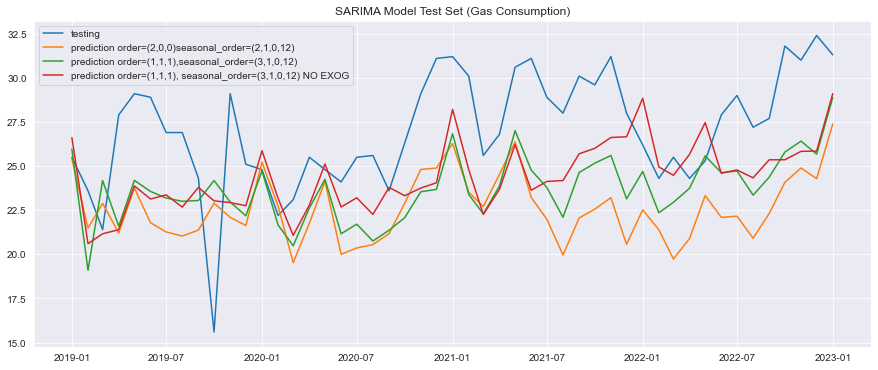

MAPE - Train: 15.91%
MAPE - Testing: 17.66%
MAPE - Train: 11.72%
MAPE - Testing: 14.21%
MAPE - Train: 12.37%
MAPE - Testing: 12.37%


In [504]:
# SARIMAX modeel
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error
sarima_model_gas = SARIMAX(Gas_train, order=(2,0,0),seasonal_order=(2,1,0,12),exog= Water_train).fit()
sarima_model_gas2 = SARIMAX(Gas_train, order=(1,1,1),seasonal_order=(3,1,0,12),exog= Water_train).fit()
sarima_model_gas3 = SARIMAX(Gas_train, order=(1,1,1), seasonal_order=(3,1,0,12)).fit()

gas_pred_train = sarima_model_gas.get_prediction(start='1990-01-01', end='2018-12-01',exog= Water_train).predicted_mean
gas_pred_test = sarima_model_gas.get_prediction(start='2019-01-01', end='2023-01-01',exog= Water_test).predicted_mean

gas_pred_train2 = sarima_model_gas2.get_prediction(start='1990-01-01', end='2018-12-01',exog= Water_train).predicted_mean
gas_pred_test2 = sarima_model_gas2.get_prediction(start='2019-01-01', end='2023-01-01',exog= Water_test).predicted_mean

gas_pred_train3= sarima_model_gas3.get_prediction(start='1990-01-01', end='2018-12-01').predicted_mean
gas_pred_test3 = sarima_model_gas3.get_prediction(start='2019-01-01', end='2023-01-01').predicted_mean

fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(Gas_test, label='testing')
ax.plot(gas_pred_test, label='prediction order=(2,0,0)seasonal_order=(2,1,0,12)')
ax.plot(gas_pred_test2, label='prediction order=(1,1,1),seasonal_order=(3,1,0,12)')
ax.plot(gas_pred_test3, label='prediction order=(1,1,1), seasonal_order=(3,1,0,12) NO EXOG')
plt.legend()
plt.title('SARIMA Model Test Set (Gas Consumption)')
plt.show()

# Calculate MAPE for train and testing data
gas_mape_train = mean_absolute_percentage_error(Gas_train, gas_pred_train)
print(f"MAPE - Train: {gas_mape_train*100:.2f}%")

gas_mape_test = mean_absolute_percentage_error(Gas_test, gas_pred_test)
print(f"MAPE - Testing: {gas_mape_test*100:.2f}%")


gas_mape_train1 = mean_absolute_percentage_error(Gas_train, gas_pred_train2)
print(f"MAPE - Train: {gas_mape_train1*100:.2f}%")

gas_mape_test1 = mean_absolute_percentage_error(Gas_test, gas_pred_test2)
print(f"MAPE - Testing: {gas_mape_test1*100:.2f}%")


gas_mape_train2 = mean_absolute_percentage_error(Gas_train, gas_pred_train3)
print(f"MAPE - Train: {gas_mape_train2*100:.2f}%")

gas_mape_test2 = mean_absolute_percentage_error(Gas_test, gas_pred_test3)
print(f"MAPE - Testing: {gas_mape_test2*100:.2f}%")


### Final __SARIMAX(1,1,1)(3,1,0,12)__ Model for Gas Consumption
- __AIC : 1776__
- __BIC : 1803__
- MAPE - Train: 11.72%
- MAPE - Testing: 14.21%

- Overall, our model improved in all areas compared to our initial model, however improvements was not significant/big
- Could be due to __Gas Consumption__ being a __long memory series__ as said earlier, which models like __ARFIMA__ could have done better, but __statsmodels__ do not offer it




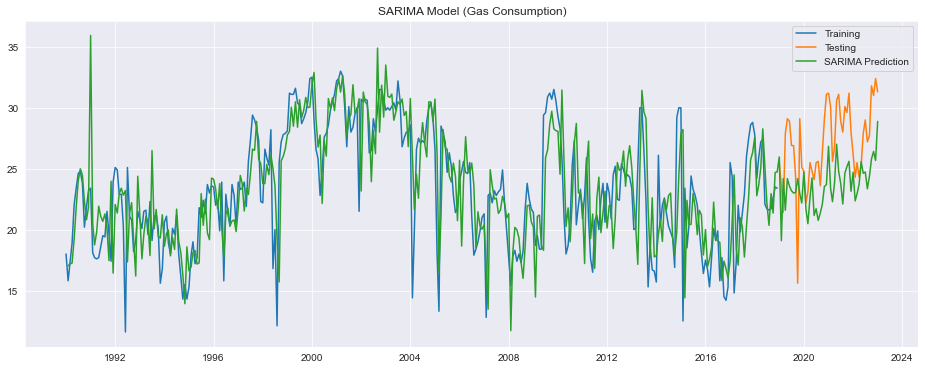

MAPE - Train: 11.72%
MAPE - Testing: 14.21%


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:              Gas Consumption (tons)   No. Observations:                  348
Model:             SARIMAX(1, 1, 1)x(3, 1, [], 12)   Log Likelihood                -881.354
Date:                             Fri, 11 Aug 2023   AIC                           1776.709
Time:                                     15:53:53   BIC                           1803.408
Sample:                                 01-01-1990   HQIC                          1787.353
                                      - 12-01-2018                                         
Covariance Type:                               opg                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Water Consumption (tons)    -0.0107      0.001     -7.550      0.000      -0.013      -0.008
ar.L1                        0.6694      0.053     12.550      0.000       0.565       0.774
ma.L1                       -0.9336      0.035    -26.772      0.000      -1.002      -0.865
ar.S.L12                    -0.7605      0.052    -14.753      0.000      -0.862      -0.659
ar.S.L24                    -0.4893      0.062     -7.905      0.000      -0.611      -0.368
ar.S.L36                    -0.2600      0.064     -4.049      0.000      -0.386      -0.134
sigma2                      11.0155      0.655     16.828      0.000       9.733      12.299
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                97.34
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.75   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [510]:
sarima_model_gas = SARIMAX(Gas_train, order=(1,1,1),seasonal_order=(3,1,0,12),exog = Water_train).fit()
pred_gas_full = sarima_model_gas.get_prediction(start='1990-01-01', end='2023-01-01',exog = Water_test).predicted_mean
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(Gas_train, label='Training')
plt.plot(Gas_test, label='Testing')
plt.plot(pred_gas_full[1:], label='SARIMA Prediction')
plt.legend()
plt.title('SARIMA Model (Gas Consumption)')
plt.show()

# Calculate MAPE for train and testing data
gas_mape_train = mean_absolute_percentage_error(Gas_train, pred_gas_full[:len(Gas_train)])
print(f"MAPE - Train: {gas_mape_train*100:.2f}%")

gas_mape_test = mean_absolute_percentage_error(Gas_test, pred_gas_full[len(Gas_train):])
print(f"MAPE - Testing: {gas_mape_test*100:.2f}%")
sarima_model_gas.summary()

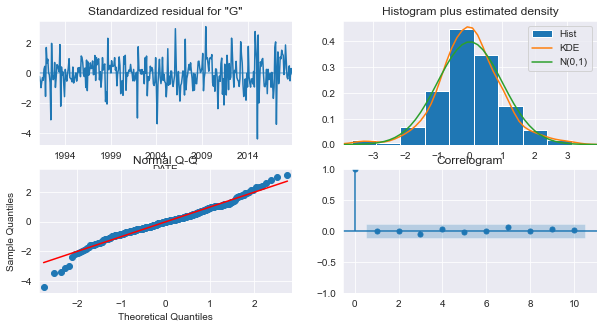

In [491]:
sarima_model_gas.plot_diagnostics(figsize=(10,5))
plt.show()

## Model Building for Electrcity Consumption



### ACF & PACF Electricity Consumption 
- Looking at the __ACF__ plot,it seems to show a sine wave pattern,having a __seasonal pattern__ every 6 lags (k=6,12,18...) even __after first order differencing__
- This suggest seasonality, and we can perform a __seasonal differencing__ by the __seasonal period of 6 or 12__
- Performing __seasonal differencing__ with `m = 12` seems to work better at removing the seasonality as compared to `m=6`, as seen from the charts below
- Looking at the final __ACF__ plot, there is a significant negative lag at 1,12 and 24. This could mean that q = 1 and Q = 2
- We would __not__ be including __p & P__ (AR terms) due to the __negative significant lags__ (1 & 2) in the __PACF__ plot
- Since we perform seasonal differencing (D=1), and non-seasonal differencing (d=1),
- we would have a __`SARIMA(0,1,1)(0,1,2,12)`__ model


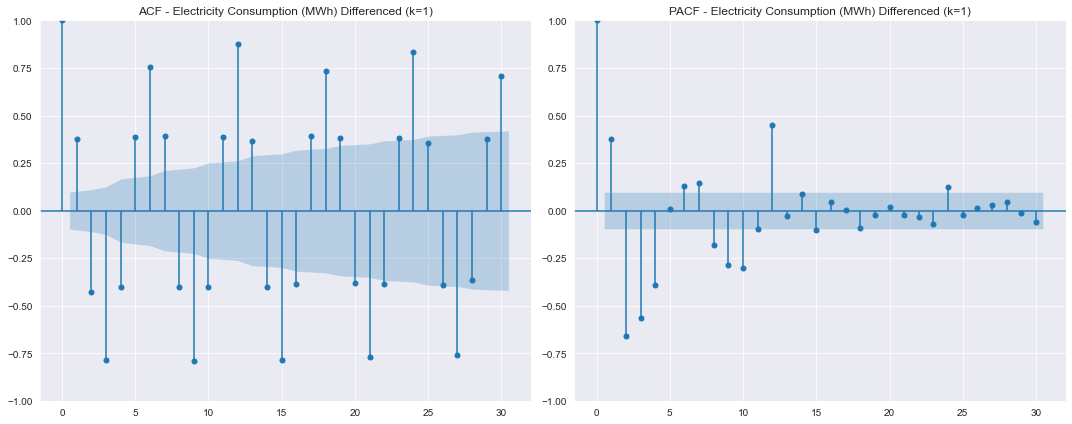

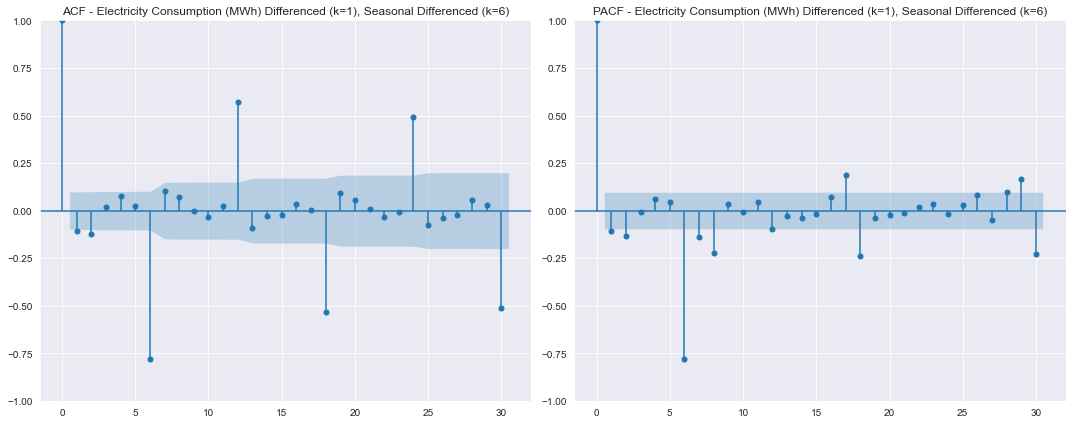

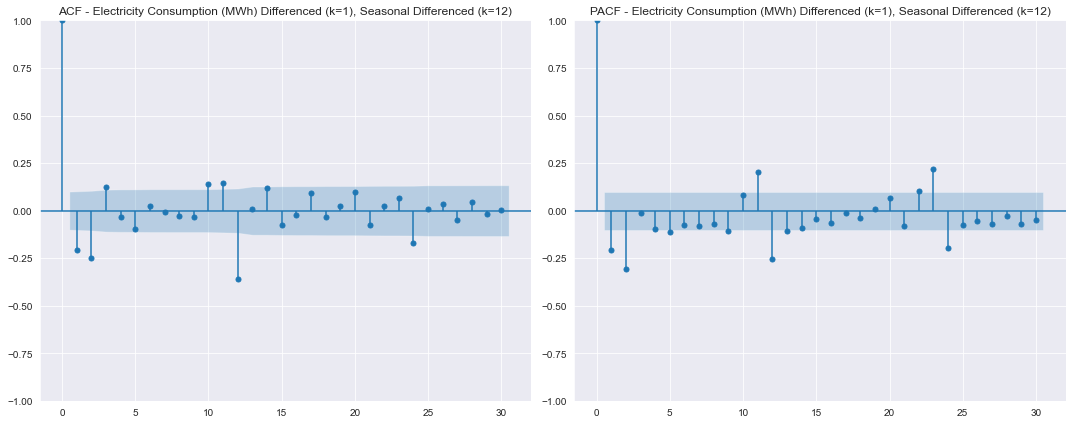

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

series2 = new_df.copy()

# Differencing with k=1 f
Elec_df = series2.iloc[:,1].dropna()
Elec_df1 = series2.iloc[:,1].diff(1).dropna()
Elec_df2 = series2.iloc[:,1].diff(1).dropna()


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 6))


plot_acf(Elec_df1, ax=ax1, lags=30)
ax1.set_title(f'ACF - {series2.columns[1]} Differenced (k=1)')

plot_pacf(Elec_df1, ax=ax2, method='ywm', lags=30)
ax2.set_title(f'PACF - {series2.columns[1]} Differenced (k=1)')

plt.tight_layout()
plt.show()


# Seasonal differencing k = 6
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 6))
plot_acf(Elec_df1.diff(6).dropna(), ax=ax1, lags=30)
ax1.set_title(f'ACF - {series2.columns[1]} Differenced (k=1), Seasonal Differenced (k=6)')

plot_pacf(Elec_df1.diff(6).dropna(), ax=ax2, method='ywm', lags=30)
ax2.set_title(f'PACF - {series2.columns[1]} Differenced (k=1), Seasonal Differenced (k=6)')

plt.tight_layout()
plt.show()


# Seasonal differencing k = 12
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 6))
plot_acf(Elec_df2.diff(12).dropna(), ax=ax1, lags=30)
ax1.set_title(f'ACF - {series2.columns[1]} Differenced (k=1), Seasonal Differenced (k=12)')

plot_pacf(Elec_df2.diff(12).dropna(), ax=ax2, method='ywm', lags=30)
ax2.set_title(f'PACF - {series2.columns[1]} Differenced (k=1), Seasonal Differenced (k=12)')

plt.tight_layout()
plt.show()

### Looking at Test and Predicted values for __SARIMA (0,1,1) , (0,1,2,12)__

The results were quite decent, as seen from the 
- __AIC : 3095__
- __BIC : 3110__
- __MAPE train score of 2.49%__ 
- __MAPE test score of 5.51%__

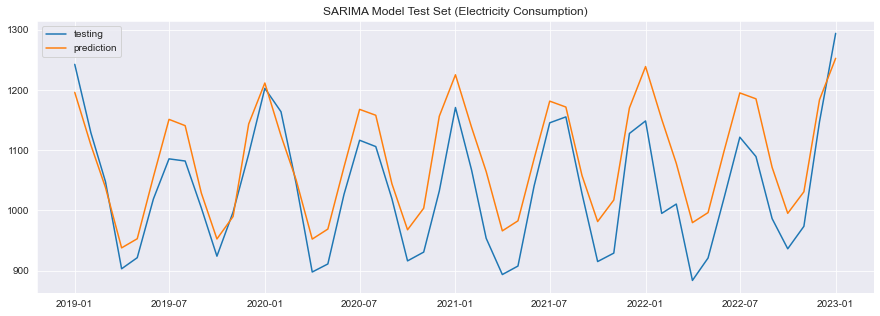

MAPE - Train: 2.49%
MAPE - Testing: 5.51%


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:           Electricity Consumption (MWh)   No. Observations:                  348
Model:             SARIMAX(0, 1, 1)x(0, 1, [1, 2], 12)   Log Likelihood               -1543.818
Date:                                 Tue, 08 Aug 2023   AIC                           3095.637
Time:                                         20:48:56   BIC                           3110.893
Sample:                                     01-01-1990   HQIC                          3101.719
                                          - 12-01-2018                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4525      0.051     -8.949      0.000      -0.552      -0.353
ma.S.L12      -0.6637      0.052    -12.694      0.000      -0.766      -0.561
ma.S.L24      -0.0562      0.052     -1.085      0.278      -0.158       0.045
sigma2       574.5752     40.153     14.310      0.000     495.877     653.273
===================================================================================
Ljung-Box (L1) (Q):                   5.91   Jarque-Bera (JB):                 8.78
Prob(Q):                              0.02   Prob(JB):                         0.01
Heteroskedasticity (H):               2.79   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# SARIMAX modeel
from statsmodels.tsa.statespace.sarimax import SARIMAX
#sarima_model = SARIMAX(Electricity_train, order=(4,1,4),seasonal_order=(4,1,4,12)).fit()
sarima_model_elec = SARIMAX(Electricity_train, order=(0,1,1),seasonal_order=(0,1,2,12)).fit()
pred_test = sarima_model_elec.get_prediction(start='2019-01-01', end='2023-01-01').predicted_mean
pred_train = sarima_model_elec.get_prediction(start='1990-01-01', end='2018-12-01').predicted_mean
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(Electricity_test, label='testing')
ax.plot(pred_test, label='prediction')
plt.legend()
plt.title('SARIMA Model Test Set (Electricity Consumption)')
plt.show()

# Calculate MAPE for train and testing data
mape_test = mean_absolute_percentage_error(Electricity_train, pred_train)
print(f"MAPE - Train: {mape_train*100:.2f}%")

mape_test = mean_absolute_percentage_error(Electricity_test, pred_test)
print(f"MAPE - Testing: {mape_test*100:.2f}%")

sarima_model_elec.summary()

In [162]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

arma_mod30 = SARIMAX(Electricity_train, order=(0,1,1),seasonal_order=(0,1,2,12)).fit()

resid = arma_mod30.resid

r, q, p = sm.tsa.acf(resid.values.squeeze(), fft=True, qstat=True)
r = r[1:25]
q = q[1:25]
p = p[1:25]

data = np.column_stack((np.arange(1, 25), r, q, p))

table = pd.DataFrame(data, columns=["lag", "AC", "Q", "Prob(>Q)"])
print(table.set_index("lag"))



            AC          Q  Prob(>Q)
lag                                
1.0  -0.000489   6.561418  0.037602
2.0  -0.136524   8.218765  0.041700
3.0  -0.068516   9.111979  0.058361
4.0  -0.050227   9.112155  0.104673
5.0   0.000703   9.640692  0.140622
6.0   0.038524   9.642953  0.209726
7.0  -0.002516  10.036566  0.262469
8.0  -0.033147  10.515664  0.310372
9.0  -0.036516  11.970283  0.287050
10.0  0.063534  18.202204  0.077006
11.0  0.131311  46.312534  0.000006
12.0 -0.278470  47.095564  0.000009
13.0 -0.046407  47.168829  0.000018
14.0 -0.014174  47.624907  0.000029
15.0 -0.035312  47.627230  0.000054
16.0  0.002517  47.923968  0.000088
17.0  0.028397  48.278901  0.000137
18.0  0.031010  48.288786  0.000233
19.0  0.005167  48.323363  0.000383
20.0  0.009650  48.472738  0.000593
21.0 -0.020026  48.474431  0.000939
22.0  0.002129  48.509438  0.001439
23.0  0.009665  49.067233  0.001858
24.0 -0.038520  49.147963  0.002710


## Improving SARIMA model for Electricity Consumption

### GridSearch using Auto ARIMA
- We can make use of Auto ARIMA to find the parameters that __Minimizes AIC__ score
- We already know for d = 1, and D = 1 and m = 12, seasonal = True
- We will let max p , P, q , Q = 2

In [ ]:
model = auto_arima(Electricity_train, start_p=0, start_q=0,
                          max_p=2, max_q=2,m=12,start_P=0,start_Q=0, 
                          max_P = 2, max_Q = 2,
                          seasonal=True,
                          d=1,D=1,trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)





Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3242.186, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3181.509, Time=0.23 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3094.468, Time=0.57 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=3213.132, Time=0.08 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=3095.945, Time=0.53 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=3095.637, Time=1.01 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=3163.634, Time=0.18 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=3095.904, Time=1.77 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=3119.024, Time=0.22 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=3048.092, Time=0.91 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.25 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=3049.745, Time=1.50 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=3049.532, Time=2.07 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=3117.611, Time=0.77 sec
 ARIMA(1,1,1)(1,1,2)[12]

### Cross-Validation for best params
- We would be using __Time Series Split__ cross-validation 
- The pros for this method are:
    - Having more splits
    - Being able to inspect how model fares on different months

- Cons are:
    - Possible leakage from future data to the model

- Cross-Validation would provide a more __accurate representation__ of how well the model would perform and __avoid overfitting__

In [ ]:
#Time Series SPlit for Cross-Validation for best params

from pmdarima import auto_arima
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Split data using time series cross-validation
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

rmse_scores = []

for train_index, val_index in tscv.split(new_df.iloc[:,1]):
    train_data = new_df.iloc[:,1][train_index]
    val_data = new_df.iloc[:,1][val_index]
    
    model = auto_arima(train_data, start_p=0, start_q=0, max_p=2, max_q=2,
                      m=12, start_P=0, start_Q=0, max_P=2, max_Q=2,
                      seasonal=True, d=1, D=1, trace=True,
                      error_action='ignore', suppress_warnings=True, stepwise=True)
    
    predictions = model.predict(len(val_data))
    rmse = np.sqrt(mean_squared_error(val_data, predictions))
    rmse_scores.append(rmse)

avg_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f"Average RMSE: {avg_rmse}")
print(f"Standard Deviation of RMSE: {std_rmse}")

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=482.448, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=485.227, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=481.026, Time=0.23 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=483.113, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.52 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=0.62 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=483.788, Time=0.07 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=0.72 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=482.831, Time=0.10 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=475.856, Time=0.22 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=475.959, Time=0.06 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.59 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=474.995, Time=0.48 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=inf, Time=0.89 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=482.967, T

### Comparing Previous Params vs Cross-validated Best Params

In [142]:
from pmdarima import auto_arima
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Split data using time series cross-validation
n_splits = 10
tscv = TimeSeriesSplit(n_splits=n_splits)

rmse_scores = []

for fold_num, (train_index, val_index) in enumerate(tscv.split(new_df.iloc[:,0]), start=1):
    train_data = new_df.iloc[:,1][train_index]
    val_data = new_df.iloc[:,1][val_index]
    
    model = SARIMAX(train_data, order=(0,1,1), seasonal_order=(0,1,2,12)).fit()
    predictions = model.get_prediction(start=len(train_data), end=len(train_data) + len(val_data) - 1)
    predicted_mean = predictions.predicted_mean
    
    rmse = np.sqrt(mean_squared_error(val_data, predicted_mean))
    rmse_scores.append(rmse)
    
    print(f"Fold {fold_num} - RMSE: {rmse}")

avg_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)
print('order=(0,1,1), seasonal_order=(0,1,2,12) \n ')
print(f"Average RMSE: {avg_rmse}")
print(f"Standard Deviation of RMSE: {std_rmse} \n")


from pmdarima import auto_arima
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Split data using time series cross-validation
n_splits = 10
tscv = TimeSeriesSplit(n_splits=n_splits)

rmse_scores = []

for fold_num, (train_index, val_index) in enumerate(tscv.split(new_df.iloc[:,0]), start=1):
    train_data = new_df.iloc[:,1][train_index]
    val_data = new_df.iloc[:,1][val_index]
    
    model = SARIMAX(train_data, order=(1,1,2), seasonal_order=(0,1,1,12)).fit()
    predictions = model.get_prediction(start=len(train_data), end=len(train_data) + len(val_data) - 1)
    predicted_mean = predictions.predicted_mean
    
    rmse = np.sqrt(mean_squared_error(val_data, predicted_mean))
    rmse_scores.append(rmse)
    
    print(f"Fold {fold_num} - RMSE: {rmse}")

avg_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print('order=(1,1,2), seasonal_order=(0,1,1,12)\n')
print(f"Average RMSE: {avg_rmse}")
print(f"Standard Deviation of RMSE: {std_rmse}")


Fold 1 - RMSE: 74.18982184061342
Fold 2 - RMSE: 23.41879990275838
Fold 3 - RMSE: 30.681057457749812
Fold 4 - RMSE: 27.74546888712269
Fold 5 - RMSE: 26.252017476229124
Fold 6 - RMSE: 40.060631958444354
Fold 7 - RMSE: 60.71395963151188
Fold 8 - RMSE: 55.520724176732955
Fold 9 - RMSE: 57.336197653996905
Fold 10 - RMSE: 39.57738165471162
order=(0,1,1), seasonal_order=(0,1,2,12) 
 
Average RMSE: 43.54960606398711
Standard Deviation of RMSE: 16.476023071796156 

Fold 1 - RMSE: 42.713116812516084
Fold 2 - RMSE: 29.927310287474747
Fold 3 - RMSE: 21.69527077352923
Fold 4 - RMSE: 29.32331934890131
Fold 5 - RMSE: 24.358899347374955
Fold 6 - RMSE: 30.539902446918067
Fold 7 - RMSE: 25.099666812035856
Fold 8 - RMSE: 55.29782474966258
Fold 9 - RMSE: 29.564320417913486
Fold 10 - RMSE: 41.13255385337179
order=(1,1,2), seasonal_order=(0,1,2,12)

Average RMSE: 32.96521848496981
Standard Deviation of RMSE: 9.81509106485975


The gridsearch suggests we use a __SARIMA (1,1,2)(0,1,1,12)__, and we can plot to see __test against predictions__

- __AIC : 3047__
- __BIC : 3066__
- MAPE: Training: 2.49%
- MAPE: Testing: 2.64%

Overall, __MAPE for Test__, __AIC__ and __BIC__ improved from our previous model, and __SARIMA (1,1,2)(0,1,1,12)__ would be a better fit for the Electricity Consumption Series

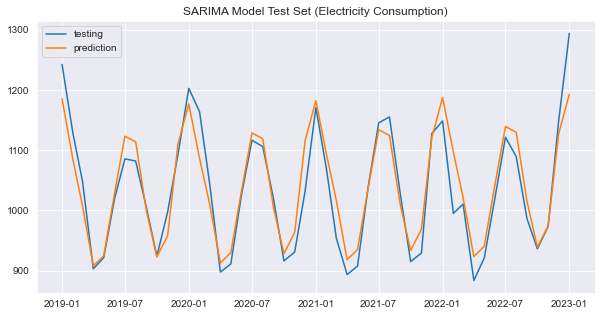

MAPE - Training: 2.49%
MAPE - Testing: 2.64%


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:        Electricity Consumption (MWh)   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -1518.607
Date:                              Thu, 10 Aug 2023   AIC                           3047.215
Time:                                      03:10:45   BIC                           3066.285
Sample:                                  01-01-1990   HQIC                          3054.818
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3331      0.116      2.884      0.004       0.107       0.559
ma.L1         -0.7225      0.116     -6.209      0.000      -0.951      -0.494
ma.L2         -0.2014      0.100     -2.008      0.045      -0.398      -0.005
ma.S.L12      -0.7394      0.037    -19.998      0.000      -0.812      -0.667
sigma2       489.7280     30.421     16.098      0.000     430.104     549.352
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                33.46
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               2.85   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# SARIMAX modeel
from statsmodels.tsa.statespace.sarimax import SARIMAX
#sarima_model = SARIMAX(Electricity_train, order=(4,1,4),seasonal_order=(4,1,4,12)).fit()
sarima_model_elec = SARIMAX(Electricity_train, order=(1,1,2),seasonal_order=(0,1,1,12)).fit()
pred_test= sarima_model_elec.get_prediction(start='2019-01-01', end='2023-01-01').predicted_mean
pred_train = sarima_model_elec.get_prediction(start='1990-01-01', end='2018-12-01').predicted_mean #To get the train mape for 1990 - 2019
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(Electricity_test, label='testing')
ax.plot(pred_test, label='prediction')
plt.legend()
plt.title('SARIMA Model Test Set (Electricity Consumption)')
plt.show()



# Calculate MAPE for training data
mape_train = mean_absolute_percentage_error(Electricity_train, pred_train)

# Calculate MAPE for testing data
mape_test = mean_absolute_percentage_error(Electricity_test, pred_test)

# Print MAPE for training and testing
print(f"MAPE - Training: {mape_train*100:.2f}%")
print(f"MAPE - Testing: {mape_test*100:.2f}%")

sarima_model_elec.summary()

### Full SARIMA Model vs Holt-Winters Exponential Smoothing Model 
- Earlier, we used the __HWES__ which achieved quite good results as well for the __Electricity Consumption__ Series
- Both `HWES` had beter __Test MAPE__ of __3.68%__ compared to `SARIMA` of __2.04%__
- However, `SARIMA` performed slightly __worse__ by on __Train MAPE__ by __0.17%__
- This could be due to the __prediction inaccuracy__ near the start of the prediction which is quite obvious on the `SARIMA` plot

This suggests that we could pick the  __`SARIMA`__ over the __`HWES`__ model over as it was a better fit for this series

SARIMA MAPE - Training: 2.21%
SARIMA MAPE - Testing: 2.60%
Holt-Winters MAPE - Training: 2.04%
Holt-Winters MAPE - Testing: 3.68%


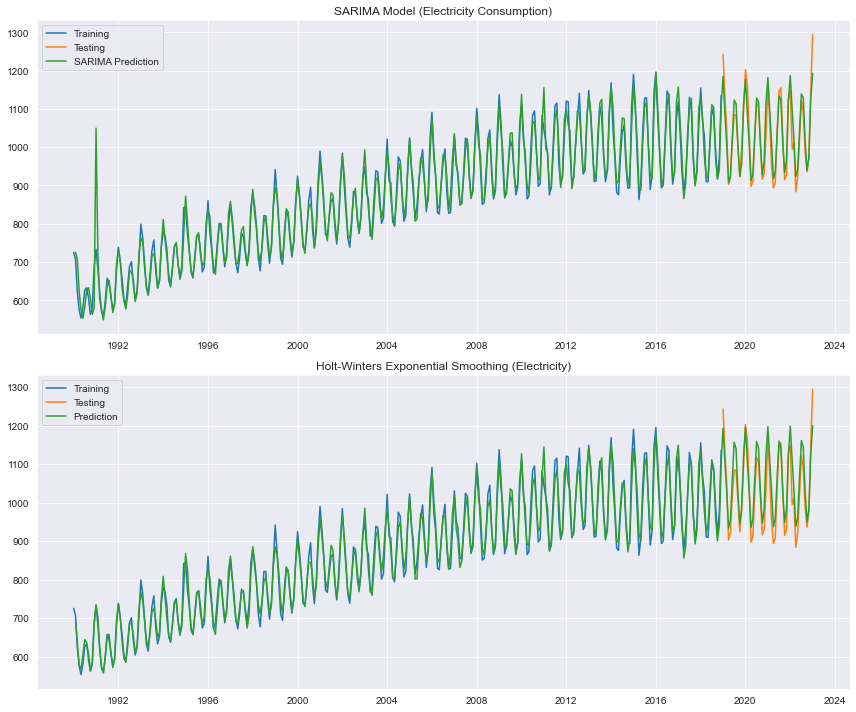

In [ ]:
# Create a subplot with two plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

#SARIMA results

sarima_model_elec = SARIMAX(Electricity_train, order=(1,1,2),seasonal_order=(0,1,1,12)).fit()
pred = sarima_model_elec.get_prediction(start='1990-02-01', end='2023-01-01').predicted_mean
ax1.plot(Electricity_train, label='Training')
ax1.plot(Electricity_test, label='Testing')
ax1.plot(pred, label='SARIMA Prediction')
ax1.legend()
ax1.set_title('SARIMA Model (Electricity Consumption)')

#Holt-Winters Exponential Smoothing results
es_model = HWES(Electricity_train, seasonal_periods=12, trend='add', seasonal='add',damped_trend=True, freq='MS').fit()
pred_es = es_model.predict(start='1990-02-01', end='2023-01-01')
ax2.plot(Electricity_train, label='Training')
ax2.plot(Electricity_test, label='Testing')
ax2.plot(pred_es, label='Prediction')
ax2.legend()
ax2.set_title('Holt-Winters Exponential Smoothing (Electricity)')

plt.tight_layout()

#MAPE for SARIMA
mape_sarima_train = mean_absolute_percentage_error(Electricity_train[1:], pred[:len(Electricity_train[1:])])
mape_sarima_test = mean_absolute_percentage_error(Electricity_test[1:], pred[len(Electricity_train):])

# MAPE for Holt-Winters
mape_hwes_train = mean_absolute_percentage_error(Electricity_train[1:], pred_es[:len(Electricity_train[1:])])
mape_hwes_test = mean_absolute_percentage_error(Electricity_test[1:], pred_es[len(Electricity_train):])


print(f"SARIMA MAPE - Training: {mape_sarima_train*100:.2f}%")
print(f"SARIMA MAPE - Testing: {mape_sarima_test*100:.2f}%")

print(f"Holt-Winters MAPE - Training: {mape_hwes_train*100:.2f}%")
print(f"Holt-Winters MAPE - Testing: {mape_hwes_test*100:.2f}%")

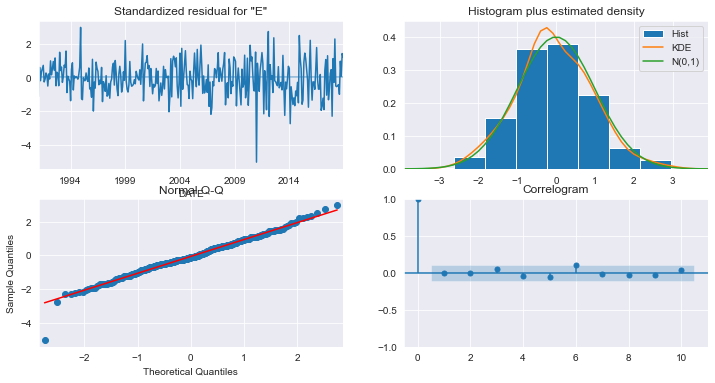

In [ ]:
sarima_model_elec.plot_diagnostics(figsize=(12,6))
plt.show()

## Model Building for Water Consumption



### ACF & PACF Water Consumption
- Looking at the __ACF__ plot (d=1),it has a __significant negative lag 1__, while __PACF__ decays more __slowly__ , with significant lags at __1,2,3,4__
- Since __first lag of ACF is -ve__ , it suggests adding a  __MA__/__q__ order of 1
- Also, the __first lag of PACF is also -ve__ , suggesting we add a __AR__/__p__ order of [1,2,3,4]
- Since we perform differencing(d=1),
- we can start with a __ARIMA (4,1,1)__ 
- also, we'll fit __Gas as an exogenous variable__ since they are on the same scale and have a __negative correlation__


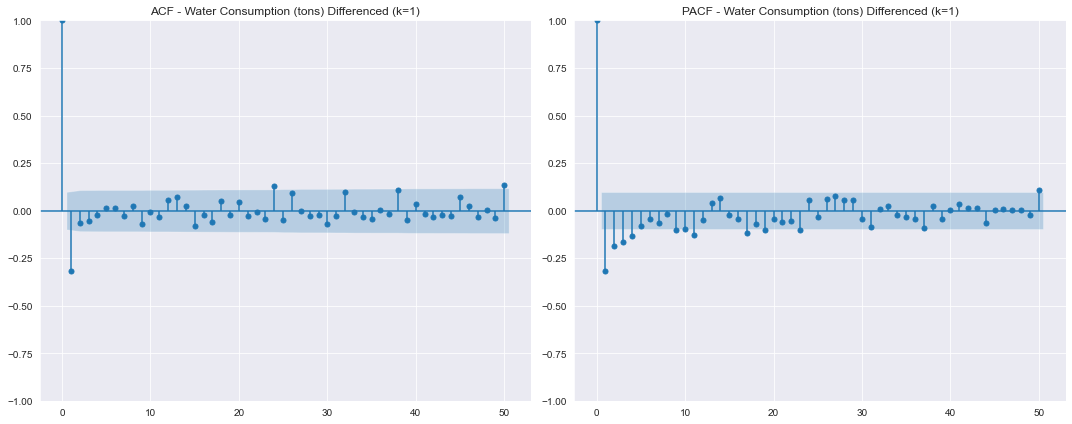

c:\Users\wilfr\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


KPSS after non-seasonal differencing:0.1 



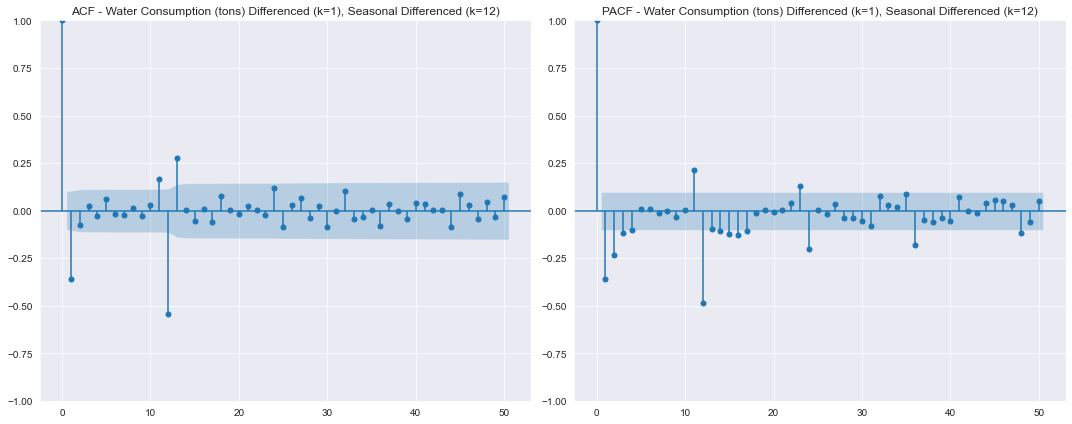

In [ ]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

series2 = new_df.copy()

# Differencing with k=1 for Water
Water_df = series2.iloc[:, 2].dropna()
Water_df1 = series2.iloc[:, 2].diff(1).dropna()

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# plot_acf(Water_df, ax=ax1, lags=50)
# ax1.set_title(f'ACF - {series2.columns[2]}')

# plot_pacf(Water_df, ax=ax2, method='ywm', lags=50)
# ax2.set_title(f'PACF - {series2.columns[2]}')

# plt.tight_layout()
# plt.show()

# Differencing k = 1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
plot_acf(Water_df1.dropna(), ax=ax1, lags=50)
ax1.set_title(f'ACF - {series2.columns[2]} Differenced (k=1)')

plot_pacf(Water_df1.dropna(), ax=ax2, method='ywm', lags=50)
ax2.set_title(f'PACF - {series2.columns[2]} Differenced (k=1)')

plt.tight_layout()
plt.show()

# Seasonal differencing k = 12
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
plot_acf(Water_df1.diff(12).dropna(), ax=ax1, lags=50)
ax1.set_title(f'ACF - {series2.columns[2]} Differenced (k=1), Seasonal Differenced (k=12)')

plot_pacf(Water_df1.diff(12).dropna(), ax=ax2, method='ywm', lags=50)
ax2.set_title(f'PACF - {series2.columns[2]} Differenced (k=1), Seasonal Differenced (k=12)')

print(f'KPSS after non-seasonal differencing:{kpss(Water_df.diff(1).dropna())[1]} \n')

plt.tight_layout()
plt.show()



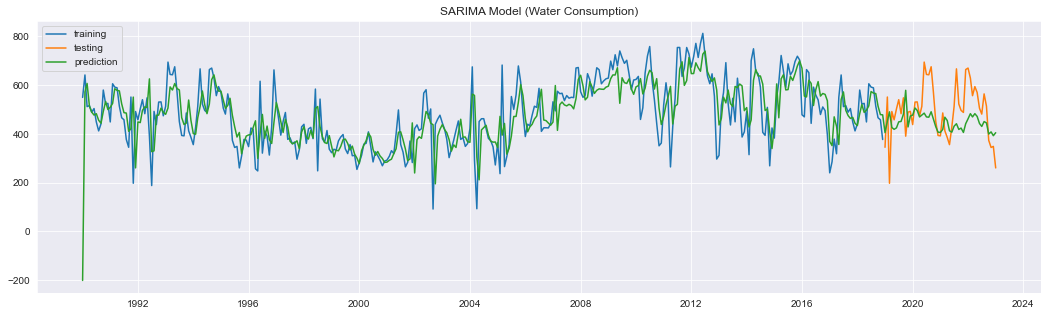

MAPE - Training: 16.92%
MAPE - Testing: 19.33%


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                   
====================================================================================
Dep. Variable:     Water Consumption (tons)   No. Observations:                  348
Model:                       ARIMA(4, 1, 1)   Log Likelihood               -2061.913
Date:                      Fri, 11 Aug 2023   AIC                           4137.827
Time:                              11:59:44   BIC                           4164.772
Sample:                          01-01-1990   HQIC                          4148.555
                               - 12-01-2018                                         
Covariance Type:                        opg                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Gas Consumption (tons)   -11.1332      1.137     -9.794      0.000     -13.361      -8.905
ar.L1                      0.5410      0.044     12.303      0.000       0.455       0.627
ar.L2                      0.0280      0.062      0.450      0.652      -0.094       0.150
ar.L3                      0.0158      0.066      0.240      0.810      -0.113       0.145
ar.L4                      0.0077      0.059      0.130      0.897      -0.109       0.124
ma.L1                     -0.9614      0.021    -45.434      0.000      -1.003      -0.920
sigma2                  8456.4987    522.789     16.176      0.000    7431.851    9481.146
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                71.45
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                            -0.45
Prob(H) (two-sided):                  0.12   Kurtosis:                         5.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [144]:
# SARIMAX modeel
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima_model_water = ARIMA(Water_train, order=(4,1,1), exog=Gas_train).fit()
pred = sarima_model_water.get_prediction(start='1990-01-01', end='2023-01-01', exog=Gas_test).predicted_mean
fig, ax = plt.subplots(figsize=(18, 5))
ax.plot(Water_train, label='training')
ax.plot(Water_test, label='testing')
ax.plot(pred, label='prediction')
plt.legend()
plt.title('SARIMA Model (Water Consumption)')
plt.show()


# Calculate MAPE for training data
mape_train_water = mean_absolute_percentage_error(Water_train, pred[:len(Water_train)])

# Calculate MAPE for testing data
mape_test_water = mean_absolute_percentage_error(Water_test, pred[len(Water_train):])

# Print MAPE for training and testing
print(f"MAPE - Training: {mape_train_water*100:.2f}%")
print(f"MAPE - Testing: {mape_test_water*100:.2f}%")

sarima_model_water.summary()

### ACF & PACF of __ARIMA (4,1,1)__ model residuals

c:\Users\wilfr\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


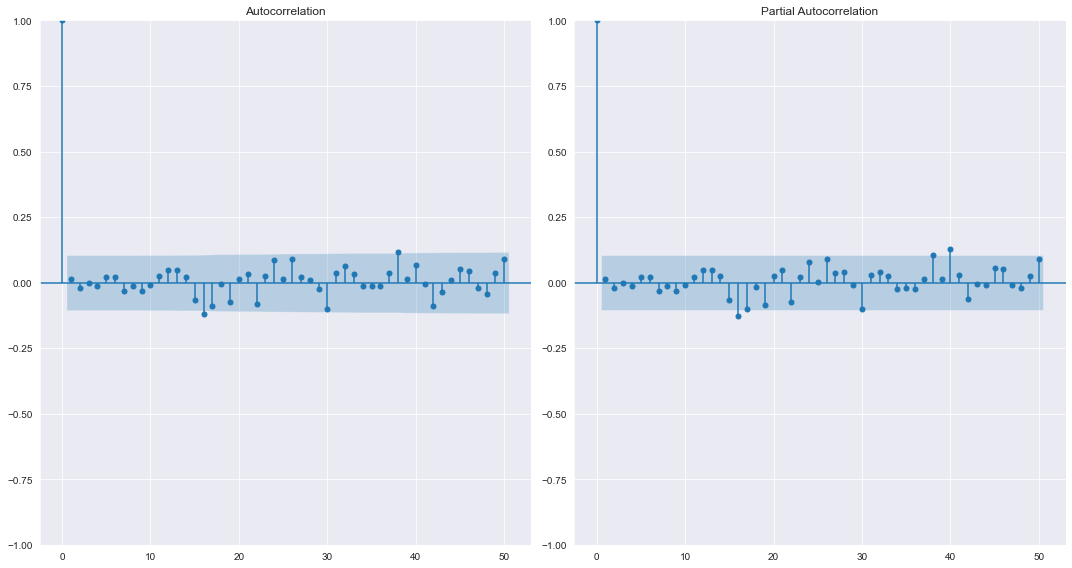

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF of residuals
residuals = sarima_model_water.resid
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
plot_acf(residuals, lags=50, ax=ax1)
plot_pacf(residuals, lags=50, ax=ax2)
plt.tight_layout()
plt.show()


## Trying SARIMAX model

### Cross-Validation for best params
- We would be using __Time Series Split__ cross-validation 
- The pros for this method are:
    - Having more splits
    - Being able to inspect how model fares on different months

- Cons are:
    - Possible leakage from future data to the model

- Cross-Validation would provide a more __accurate representation__ of how well the model would perform and __avoid overfitting__

In [512]:
#Time Series SPlit for Cross-Validation for best params

from pmdarima import auto_arima
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Split data using time series cross-validation
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

mse_scores = []

for train_index, val_index in tscv.split(new_df.iloc[:,2]):
    train_data = new_df.iloc[:,1][train_index]
    val_data = new_df.iloc[:,1][val_index]
    
    model = auto_arima(train_data, start_p=0, start_q=0, max_p=4, max_q=2,
                      m=12, start_P=0, start_Q=0, max_P=2, max_Q=2,
                      seasonal=True, d=1, D=1, trace=True,
                      error_action='ignore', suppress_warnings=True, stepwise=True,alpha =0.05,exogenous = new_df[['Gas Consumption (tons)']],n_jobs=-1)
    
    predictions = model.predict(len(val_data))
    rmse = np.sqrt(mean_squared_error(val_data, predictions))
    rmse_scores.append(rmse)

avg_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f"Average RMSE: {avg_rmse}")
print(f"Standard Deviation of RMSE: {std_rmse}")

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=482.448, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=485.227, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=481.026, Time=0.14 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=483.113, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.50 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=0.57 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=483.788, Time=0.06 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=0.74 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=482.831, Time=0.09 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=475.856, Time=0.20 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=475.959, Time=0.08 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.61 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=474.995, Time=0.51 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=inf, Time=0.86 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=482.967, T

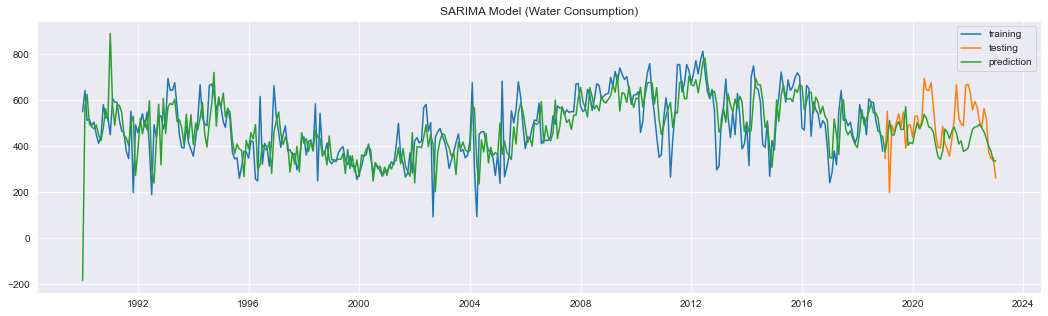

MAPE - Training: 18.41%
MAPE - Testing: 18.66%


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:             Water Consumption (tons)   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -2009.659
Date:                              Fri, 11 Aug 2023   AIC                           4031.318
Time:                                      23:39:01   BIC                           4054.203
Sample:                                  01-01-1990   HQIC                          4040.442
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Gas Consumption (tons)   -10.2150      1.192     -8.567      0.000     -12.552      -7.878
ar.L1                      0.5997      0.108      5.553      0.000       0.388       0.811
ma.L1                     -1.0371      0.123     -8.437      0.000      -1.278      -0.796
ma.L2                      0.0804      0.103      0.779      0.436      -0.122       0.283
ma.S.L12                  -0.8894      0.038    -23.380      0.000      -0.964      -0.815
sigma2                  8923.7598    596.062     14.971      0.000    7755.500    1.01e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                25.02
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.39   Skew:                            -0.25
Prob(H) (two-sided):                  0.08   Kurtosis:                         4.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [528]:
# SARIMAX modeel
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima_model_water = SARIMAX(Water_train, order=(1,1,2),seasonal_order=(0,1,1,12),exog=Gas_train).fit()
pred = sarima_model_water.get_prediction(start='1990-01-01', end='2023-01-01', exog=Gas_test).predicted_mean
fig, ax = plt.subplots(figsize=(18, 5))
ax.plot(Water_train, label='training')
ax.plot(Water_test, label='testing')
ax.plot(pred, label='prediction')
plt.legend()
plt.title('SARIMA Model (Water Consumption)')
plt.show()


# Calculate MAPE for training data
mape_train_water = mean_absolute_percentage_error(Water_train, pred[:len(Water_train)])

# Calculate MAPE for testing data
mape_test_water = mean_absolute_percentage_error(Water_test, pred[len(Water_train):])

# Print MAPE for training and testing
print(f"MAPE - Training: {mape_train_water*100:.2f}%")
print(f"MAPE - Testing: {mape_test_water*100:.2f}%")

sarima_model_water.summary()

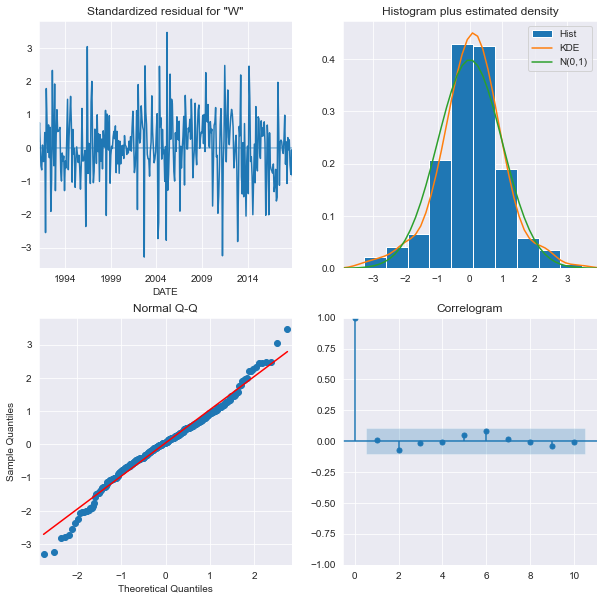

In [515]:
sarima_model_water.plot_diagnostics(figsize=(10,10))
plt.show()

In [518]:
#Time Series SPlit for Cross-Validation for best params

from pmdarima import auto_arima
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Split data using time series cross-validation
n_splits = 10
tscv = TimeSeriesSplit(n_splits=n_splits)

mse_scores = []

for train_index, val_index in tscv.split(new_df.iloc[:,2]):
    train_data = new_df.iloc[:,1][train_index]
    val_data = new_df.iloc[:,1][val_index]
    
    model = auto_arima(train_data, start_p=0, start_q=0, max_p=3, max_q=3,
                      m=12, start_P=0, start_Q=0, max_P=3, max_Q=3,
                      seasonal=True, d=1, D=1, trace=True,
                      error_action='ignore', suppress_warnings=True, stepwise=True,alpha =0.05,exogenous = new_df[['Gas Consumption (tons)']],n_jobs=-1)
    
    predictions = model.predict(len(val_data))
    rmse = np.sqrt(mean_squared_error(val_data, predictions))
    rmse_scores.append(rmse)

avg_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f"Average RMSE: {avg_rmse}")
print(f"Standard Deviation of RMSE: {std_rmse}")

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=204.250, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=205.158, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=204.560, Time=0.07 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=206.250, Time=0.03 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=206.250, Time=0.04 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=208.250, Time=0.05 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=203.174, Time=0.04 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=205.162, Time=0.07 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.32 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=204.977, Time=0.05 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=204.412, Time=0.05 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=202.568, Time=0.04 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=204.557, Time=0.07 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.36 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AI

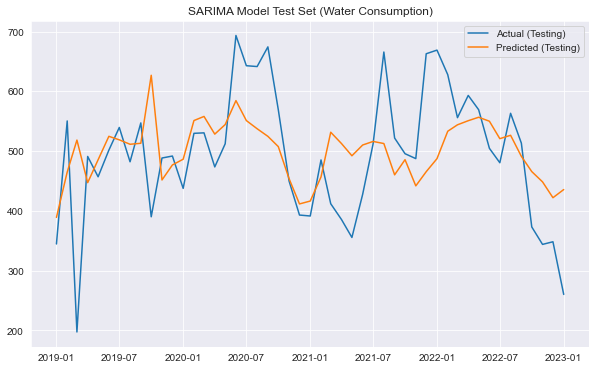

MAPE - Training: 18.15%
MAPE - Testing: 17.46%


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:           Water Consumption (tons)   No. Observations:                  348
Model:             SARIMAX(1, 1, 1)x(2, 1, 1, 12)   Log Likelihood               -2010.904
Date:                            Fri, 11 Aug 2023   AIC                           4035.809
Time:                                    21:42:11   BIC                           4062.508
Sample:                                01-01-1990   HQIC                          4046.453
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Gas Consumption (tons)   -11.0564      1.210     -9.141      0.000     -13.427      -8.686
ar.L1                      0.6118      0.042     14.397      0.000       0.529       0.695
ma.L1                     -0.9988      0.096    -10.409      0.000      -1.187      -0.811
ar.S.L12                   0.0896      0.069      1.301      0.193      -0.045       0.225
ar.S.L24                   0.1375      0.070      1.971      0.049       0.001       0.274
ma.S.L12                  -0.9624      0.092    -10.486      0.000      -1.142      -0.783
sigma2                  8703.1810   1129.546      7.705      0.000    6489.312    1.09e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.63   Jarque-Bera (JB):                26.93
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               1.37   Skew:                            -0.21
Prob(H) (two-sided):                  0.10   Kurtosis:                         4.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [519]:
# Import SARIMAX and other necessary libraries
from statsmodels.tsa.statespace.sarimax import SARIMAX


# Create the SARIMA model for water consumption ARIMA(2,1,1)(2,1,1)[12] ARIMA(1,1,2)(2,1,1)[12]   
sarima_model_water = SARIMAX(Water_train, order=(1, 1, 1), seasonal_order=(2, 1, 1, 12), exog=Gas_train).fit()


pred_full = sarima_model_water.get_prediction(start='1990-01-01', end='2023-01-01', exog=Gas_test).predicted_mean

# Get predictions for the training period
pred_train_water = sarima_model_water.get_prediction(start='1990-01-01', end='2018-12-01', exog=Gas_test).predicted_mean

# Get predictions for the test period
pred_test_water = sarima_model_water.get_prediction(start='2019-01-01', end='2023-01-01', exog=Gas_test).predicted_mean

# Rest of the code remains unchanged...



# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Water_test, label='Actual (Testing)')
ax.plot(pred_test_water, label='Predicted (Testing)')
plt.legend()
plt.title('SARIMA Model Test Set (Water Consumption)')
plt.show()

# Calculate MAPE for training data
mape_train_water = mean_absolute_percentage_error(Water_train, pred_train_water)

# Calculate MAPE for testing data
mape_test_water = mean_absolute_percentage_error(Water_test, pred_test_water)

# Print MAPE for training and testing
print(f"MAPE - Training: {mape_train_water*100:.2f}%")
print(f"MAPE - Testing: {mape_test_water*100:.2f}%")

# Display model summary
sarima_model_water.summary()


## Auto ARIMA model for Comparison
- I would be using the __`Auto ARIMA`__ model to compare with the manually tunned SARIMAX models
- After which i would try to improve it manually by performing parameter tunning (e.g. p,d,q)


### Auto ARIMA (Gas Consumption)
- __`AIC`__ of the base model was __1875.027__
- The model seems to perform quite decent on the __train data__ with a __`MAPE`__ score of __11.20%__, and from the plot we can see that ut generally follows the trend of the actual chart
- However the model fails to capture the patterns for the __test data__ well as the __prediction line__ was basically a __straight line__, although it has a __`MAPE`__ score of __15.67%__


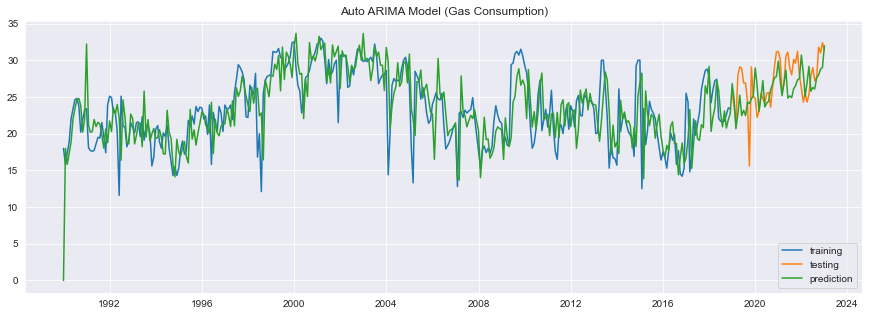

In [520]:
# auto-arima model
from pmdarima.arima import auto_arima

arima_model_gas = auto_arima(Gas_train,m=12,d=1,D=1,seasonal=True,error_action='ignore', suppress_warnings=True,exogenous=Water_train)

# use the model to make predictions
pred_in_sample = arima_model_gas.predict_in_sample(exogenous=Water_test)
pred_out_sample = arima_model_gas.predict(n_periods=len(Gas_test),exogenous=Water_test)
pred_full = np.concatenate((pred_in_sample, pred_out_sample))
# Plot the results
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(Gas_train, label='training')
ax.plot(Gas_test, label='testing')
ax.plot(new_df.index, pred_full, label='prediction')
plt.legend()
plt.title('Auto ARIMA Model (Gas Consumption)')
plt.show()

In [ ]:
# To evaluate the auto arima model
from sklearn.metrics import mean_absolute_percentage_error
mape_train = mean_absolute_percentage_error(Gas_train, pred_in_sample)
mape_test = mean_absolute_percentage_error(Gas_test, pred_out_sample)
print(arima_model_gas.summary())
print(f'\nModel Mean Absolute Percentage Error on training data is {mape_train*100:.2f}%')
print(f'\nModel Mean Absolute Percentage Error on testing data is {mape_test*100:.2f}%')


                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  348
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 12)   Log Likelihood                -909.909
Date:                             Fri, 11 Aug 2023   AIC                           1829.819
Time:                                     02:49:44   BIC                           1848.890
Sample:                                 01-01-1990   HQIC                          1837.422
                                      - 12-01-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5946      0.045     13.329      0.000       0.507       0.682
ma.L1         -0.9457      

### Auto ARIMA (Water Consumption)
- __`AIC`__ of the base model was __4215.082__
- __`BIC`__ of the base model was __4249.751__
- The model seems to perform quite decent on the __train data__ with a __`MAPE`__ score of __11.20%__, and from the plot we can see that ut generally follows the trend of the actual chart
- However the model fails to capture the patterns for the __test data__ well as the __prediction line__ was basically a __straight line__, although it has a __`MAPE`__ score of __15.67%__

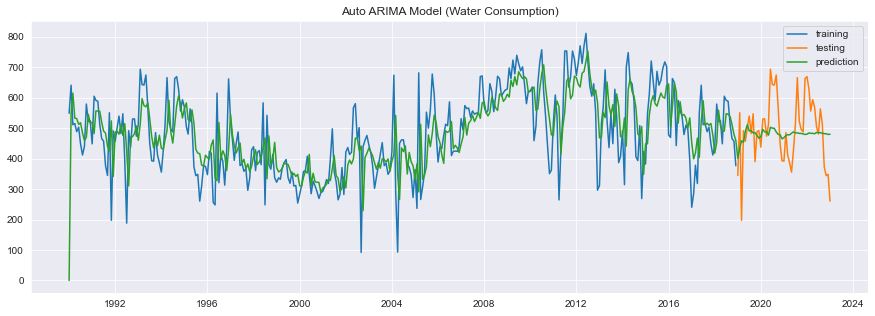

In [ ]:
# auto-arima model
from pmdarima.arima import auto_arima
arima_model_water = auto_arima(Water_train, seasonal=True,m=12,error_action='ignore',  suppress_warnings=True,exog=Gas_train)

# use the model to make predictions
pred_in_sample = arima_model_water.predict_in_sample(exog=Gas_test)
pred_out_sample = arima_model_water.predict(n_periods=len(Water_test),exog=Gas_test)
pred_full = np.concatenate((pred_in_sample, pred_out_sample))
# Plot the results
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(Water_train, label='training')
ax.plot(Water_test, label='testing')
ax.plot(new_df.index, pred_full, label='prediction')
plt.legend()
plt.title('Auto ARIMA Model (Water Consumption)')
plt.show()

In [ ]:
# To evaluate the auto arima model
from sklearn.metrics import mean_absolute_percentage_error
mape_train = mean_absolute_percentage_error(Water_train, pred_in_sample)
mape_test = mean_absolute_percentage_error(Water_test, pred_out_sample)
print(arima_model_water.summary())
print(f'\nModel Mean Absolute Percentage Error on training data is {mape_train*100:.2f}%')
print(f'\nModel Mean Absolute Percentage Error on testing data is {mape_test*100:.2f}%')

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  348
Model:             SARIMAX(1, 1, 1)x(2, 0, [], 12)   Log Likelihood               -2080.074
Date:                             Fri, 11 Aug 2023   AIC                           4170.148
Time:                                     02:27:53   BIC                           4189.394
Sample:                                 01-01-1990   HQIC                          4177.811
                                      - 12-01-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4618      0.048      9.603      0.000       0.368       0.556
ma.L1         -0.9330      

### Auto ARIMA (Electricity Consumption)
- __`AIC`__ of the base model was 3179.269, which could be due to model being more complex, due to more parameters
- The model seems to perform quite well on the __train data__ and __test data__ with a __`MAPE`__ score of __2.68%__ on __test__ and __2.38%__ on __train__, and from the plot we can see that ut generally follows the trend of the actual chart


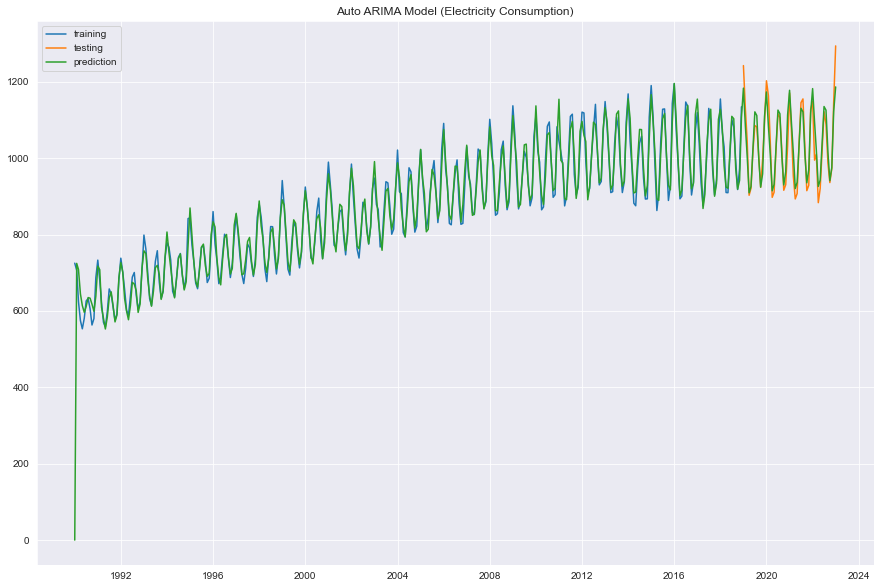

In [ ]:
# auto-arima model
from pmdarima.arima import auto_arima
arima_model_electricity = auto_arima(Electricity_train,max_d=3, seasonal=True, m=12,error_action='ignore',  suppress_warnings=True)

# use the model to make predictions
pred_in_sample = arima_model_electricity.predict_in_sample()
pred_out_sample = arima_model_electricity.predict(n_periods=len(Electricity_test))
pred_full = np.concatenate((pred_in_sample, pred_out_sample))
# Plot the results
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(Electricity_train, label='training')
ax.plot(Electricity_test, label='testing')
ax.plot(new_df.index, pred_full, label='prediction')
plt.legend()
plt.title('Auto ARIMA Model (Electricity Consumption)')
plt.show()


In [ ]:
# To evaluate the auto arima model
from sklearn.metrics import mean_absolute_percentage_error
mape_train = mean_absolute_percentage_error(Electricity_train, pred_in_sample)
mape_test = mean_absolute_percentage_error(Electricity_test, pred_out_sample)
print(arima_model_electricity.summary())
print(f'\nModel Mean Absolute Percentage Error on training data is {mape_train*100:.2f}%')
print(f'\nModel Mean Absolute Percentage Error on testing data is {mape_test*100:.2f}%')

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1583.634
Date:                              Tue, 08 Aug 2023   AIC                           3179.269
Time:                                      13:32:01   BIC                           3202.365
Sample:                                  01-01-1990   HQIC                          3188.465
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3112      0.110      2.817      0.005       0.095       0.528
ma.L1         -0.68